In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv(r"D:\ExcelR_Assignments\Multi_Linear_Regression\Datasets\ToyotaCorolla.csv", encoding='latin1')
data

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

In [3]:
# Selecting only useful and relevent colunms as per problem statement

In [4]:
# Select relevant columns
df = data[["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]]
df

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [5]:
# Descriptive Statistics

In [6]:
# Describing the data 

In [7]:
df.describe()

Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
25%       3.000000     5.000000      69.000000  1040.00000  
50%       4.000000     5.000000      85.000000  1070.00000  
75%       5.000000     5.000000      85.000000  1085.00000  
max       5.000000     6.000000     283.000000  1615.00000

In [8]:
df.var()

Price            1.315487e+07
Age_08_04        3.459596e+02
KM               1.406734e+09
HP               2.244327e+02
cc               1.801041e+05
Doors            9.075927e-01
Gears            3.553619e-02
Quarterly_Tax    1.691563e+03
Weight           2.771088e+03
dtype: float64

In [9]:
# Checking for datatypes of columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [11]:
df.shape

(1436, 9)

In [12]:
# Checking for null values

In [13]:
df.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

<Axes: >

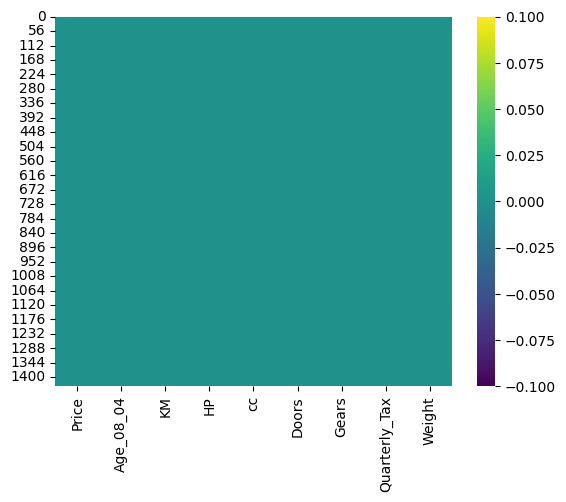

In [14]:
sns.heatmap(df.isnull(), cmap='viridis')

In [15]:
# There is no null values are present in dataset

In [16]:
# Checking for duplicates records and droping duplicated records

In [17]:
df[df.duplicated()].shape

(1, 9)

In [18]:
df[df.duplicated()]

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
113  24950          8  13253  116  2000      5      5            234    1320

In [19]:
# Droping duplicated records

In [20]:
df = df.drop_duplicates().reset_index(drop=True)
df

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1430   7500         69  20544   86  1300      3      5             69    1025
1431  10845         72  19000   86  1300      3      5             69    1015
1432   8500         71  17016   86  1300      3      5             69    1015
1433   7250         70  16916   86  1300      3      5             69    1015
1434   6950         76      1  110  1600      5      5             19    1114

[1435 rows x 9 columns]

In [21]:
df[df.duplicated()].shape

(0, 9)

In [22]:
# Checking for correlation between columns

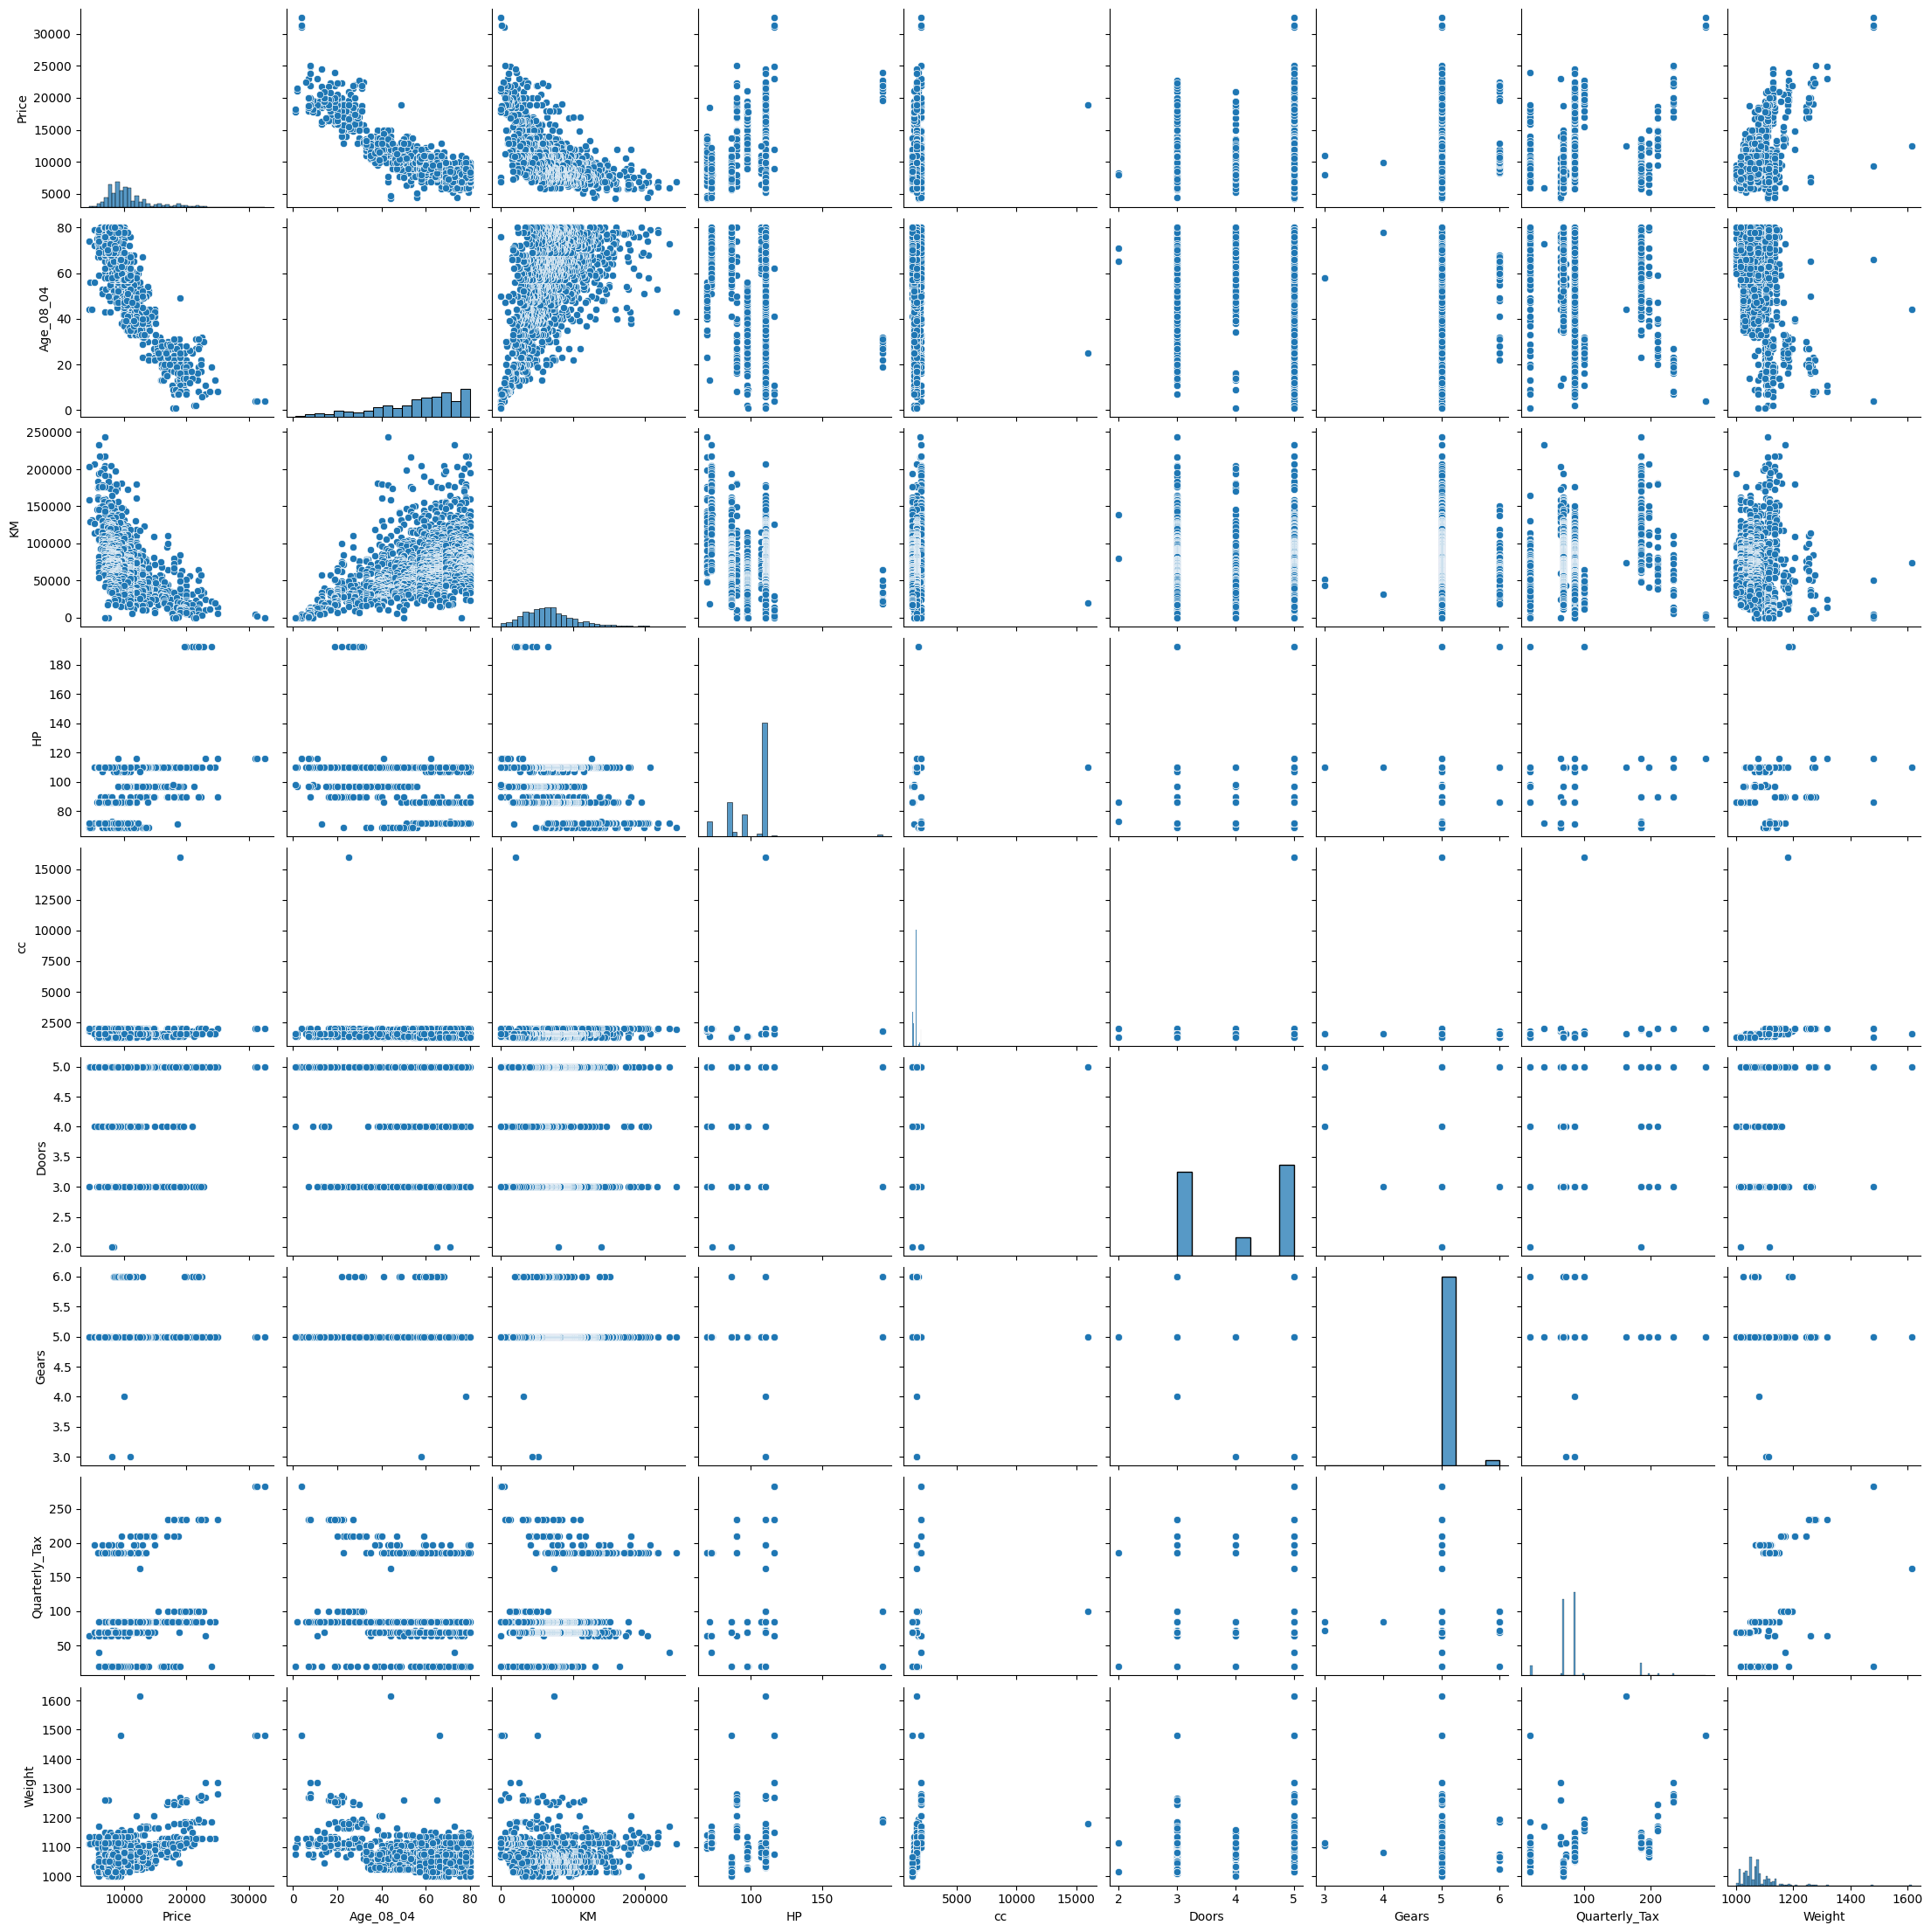

In [23]:
sns.pairplot(df)

In [24]:
df.corr()

Price  Age_08_04        KM        HP        cc     Doors  \
Price          1.000000  -0.876273 -0.569420  0.314134  0.124375  0.183604   
Age_08_04     -0.876273   1.000000  0.504575 -0.155293 -0.096549 -0.146929   
KM            -0.569420   0.504575  1.000000 -0.332904  0.103822 -0.035193   
HP             0.314134  -0.155293 -0.332904  1.000000  0.035207  0.091803   
cc             0.124375  -0.096549  0.103822  0.035207  1.000000  0.079254   
Doors          0.183604  -0.146929 -0.035193  0.091803  0.079254  1.000000   
Gears          0.063831  -0.005629  0.014890  0.209642  0.014732 -0.160101   
Quarterly_Tax  0.211508  -0.193319  0.283312 -0.302287  0.305982  0.107353   
Weight         0.575869  -0.466484 -0.023969  0.087143  0.335077  0.301734   

                  Gears  Quarterly_Tax    Weight  
Price          0.063831       0.211508  0.575869  
Age_08_04     -0.005629      -0.193319 -0.466484  
KM             0.014890       0.283312 -0.023969  
HP             0.209642      -0.302287  0.087143  
cc             0.014732       0.305982  0.335077  
Doors         -0.160101       0.107353  0.301734  
Gears          1.000000      -0.005125  0.021238  
Quarterly_Tax -0.005125       1.000000  0.621988  
Weight         0.021238       0.621988  1.000000

<Axes: >

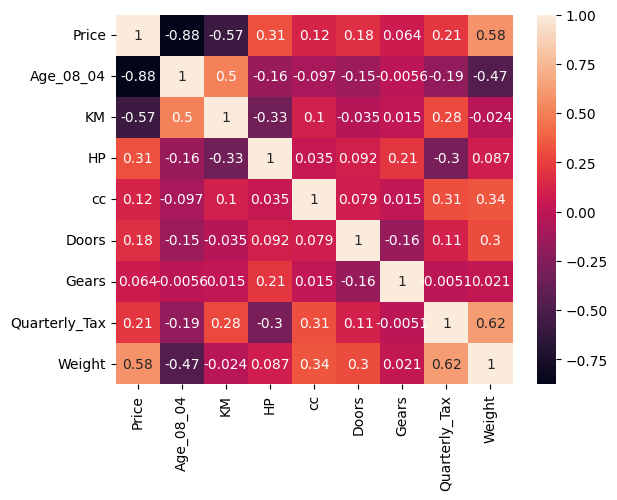

In [25]:
sns.heatmap(df.corr(), annot=True)

In [26]:
# Basic Model Building

In [27]:
X = df[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
Y = df[['Price']]

In [28]:
model1 = smf.ols('Y~X', data=df).fit()
predictions = model1.predict(X)
predictions

0       16791.958871
1       16253.800414
2       16779.635210
3       16405.789389
4       16200.217277
            ...     
1430     8794.255037
1431     8292.577342
1432     8455.434402
1433     8579.222041
1434    10396.087526
Length: 1435, dtype: float64

In [29]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 16 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:34:34   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
X[0]        -121.7139      2.615    -46.552      0.000    -126.843    -116.585
X[1]          -0.0207      0.001    -16.552      0.000      -0.023      -0.018
X[2]          31.5846      2.818     11.210      0.000      26.058      37.112
X[3]          -0.1186      0.090     -1.316      0.188      -0.295       0.058
X[4]          -0.9202     39.988     -0.023      0.982     -79.362      77.522
X[5]         597.7159    196.969      3.035      0.002     211.335     984.097
X[6]           3.8588      1.311      2.944      0.003       1.288       6.430
X[7]          16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
model1.params

Intercept   -5472.540368
X[0]         -121.713891
X[1]           -0.020737
X[2]           31.584612
X[3]           -0.118558
X[4]           -0.920189
X[5]          597.715894
X[6]            3.858805
X[7]           16.855470
dtype: float64

In [31]:
model1.pvalues

Intercept     1.113392e-04
X[0]         1.879217e-288
X[1]          1.994713e-56
X[2]          5.211155e-28
X[3]          1.882393e-01
X[4]          9.816443e-01
X[5]          2.452430e-03
X[6]          3.290363e-03
X[7]          1.031118e-51
dtype: float64

In [32]:
model1.rsquared, model1.rsquared_adj

(0.8625200256947001, 0.8617487495415147)

In [33]:
df.values

array([[13500,    23, 46986, ...,     5,   210,  1165],
       [13750,    23, 72937, ...,     5,   210,  1165],
       [13950,    24, 41711, ...,     5,   210,  1165],
       ...,
       [ 8500,    71, 17016, ...,     5,    69,  1015],
       [ 7250,    70, 16916, ...,     5,    69,  1015],
       [ 6950,    76,     1, ...,     5,    19,  1114]], dtype=int64)

In [34]:
data=df.drop(columns=['Price'])

In [35]:
VIF = pd.DataFrame({
    'Features': data.columns,
    'VIF': [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
})
VIF

Features         VIF
0      Age_08_04   16.392665
1             KM    7.601207
2             HP   64.894446
3             cc   17.186097
4          Doors   21.856114
5          Gears  439.672599
6  Quarterly_Tax   11.021647
7         Weight  543.522036

In [36]:
# Geras and Weight have a high variance inflation factor because they "explain" the same variance within this dataset. 
# We would need to discard one of these variables to improve model and try too9o9 solve multicolinearity.

In [37]:
# Subset Selection 

In [1]:
# Removed 'Gear' column & testing model's performance

In [39]:
weight_model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Weight+Quarterly_Tax', data=df).fit()
weight_model.rsquared, weight_model.aic

(0.861632231877993, 24757.644103864768)

In [40]:
# Removed weight column & testing model's performance

In [41]:
gears_model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax', data=df).fit()
gears_model.rsquared, gears_model.aic

(0.8385720455246246, 24978.840477013637)

In [42]:
# here r_square of 'weight_model' > r_square of 'gears_model'
# and AIC value of 'weight_model' < AIC value of 'gears_model'

In [43]:
# so we will keep "Weight" column and deletig gears column.

In [44]:
# Model Validation Techniques

In [45]:
#1. Residual Analysis
# Normality Test

In [46]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Weight+Quarterly_Tax', data=df).fit()
model.rsquared

0.861632231877993

In [48]:
# Calculating residuals values

In [49]:
model.fittedvalues # errors

0       16828.839912
1       16298.032122
2       16814.888187
3       16442.555915
4       16233.902063
            ...     
1430     8783.176655
1431     8280.370295
1432     8442.799294
1433     8566.692519
1434    10374.167169
Length: 1435, dtype: float64

In [50]:
model.resid # residuals (Difference between actual values - predicted values)

0      -3328.839912
1      -2548.032122
2      -2864.888187
3      -1492.555915
4      -2483.902063
           ...     
1430   -1283.176655
1431    2564.629705
1432      57.200706
1433   -1316.692519
1434   -3424.167169
Length: 1435, dtype: float64

In [51]:
# Checking for normality of residuals 
#1. histogram 

<Axes: ylabel='Count'>

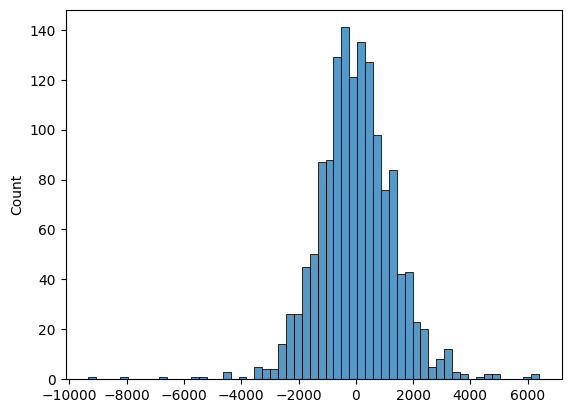

In [52]:
sns.histplot(data = df, x = model.resid)

In [53]:
model.resid.mean()

1.4985329065900231e-09

In [54]:
# here mean of residual is approximately 0. 
# plotting histogram we can see that residuals is having very high skewness 

In [55]:
#2. Q-Q plot

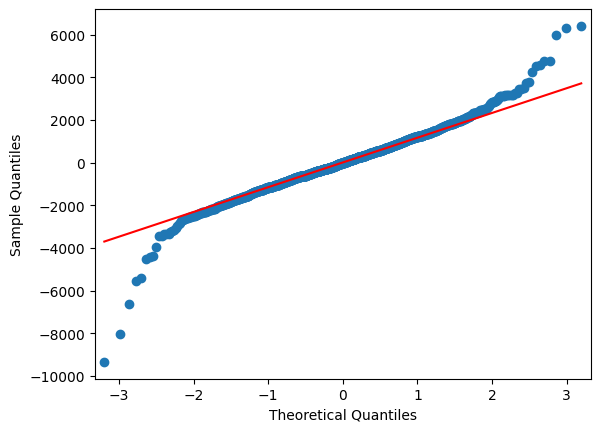

In [56]:
sm.qqplot(model.resid, line='q');

In [57]:
# We can see there is high skewness is present in residuals

In [58]:
# Getting index no. of higher residual and lower residual
lower_residual = np.argmin(model.resid), np.min(model.resid)
higher_residual = np.argmax(model.resid), np.max(model.resid)
print('Lower is :', lower_residual, 'Higher is :', higher_residual)

Lower is : (220, -9346.368270035702) Higher is : (522, 6403.795731879323)


In [59]:
# Plotting residuals plot of homoscedasticity

In [60]:
model.params

Intercept       -2636.384329
Age_08_04        -121.847802
KM                 -0.020454
HP                 33.647877
cc                 -0.122677
Doors             -23.980630
Weight             16.884429
Quarterly_Tax       4.035301
dtype: float64

Text(0, 0.5, 'Errors')

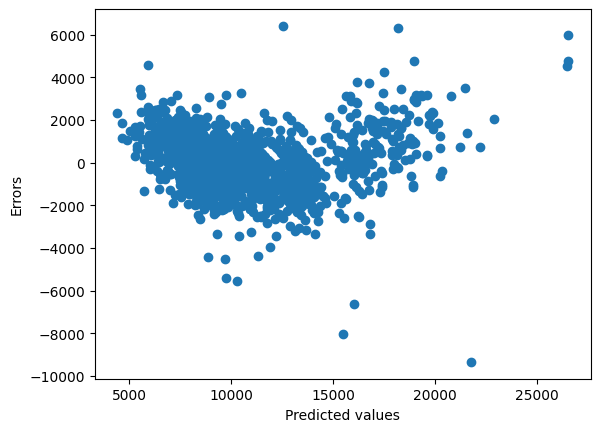

In [61]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted values')
plt.ylabel('Errors')

In [62]:
# we can see U shaped pattern(at some point error is reducing but again it is increasing)
# some of the datapoints are clustered together and some of datapoints are far away from mejority of records.

In [63]:
#3. Residuals v/s regressors plot

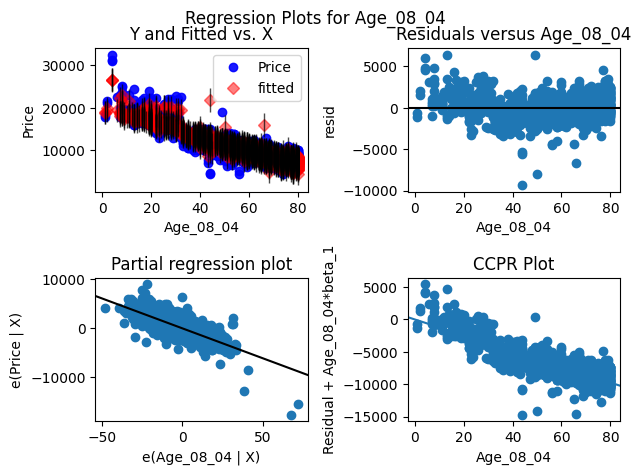

In [64]:
sm.graphics.plot_regress_exog(model, 'Age_08_04');

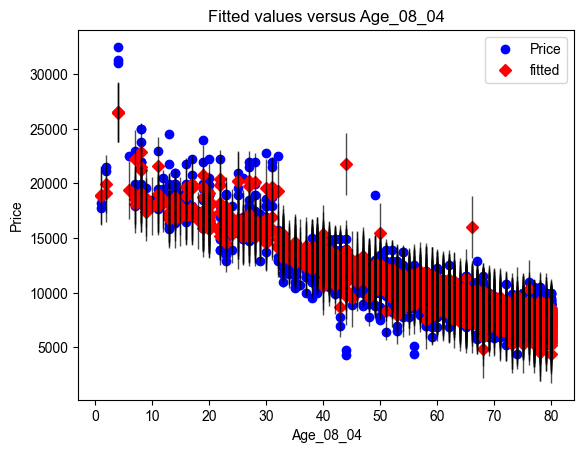

In [65]:
sm.graphics.plot_fit(model, 'Age_08_04');
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

In [66]:
# There is some difference between Actual value and predicted values

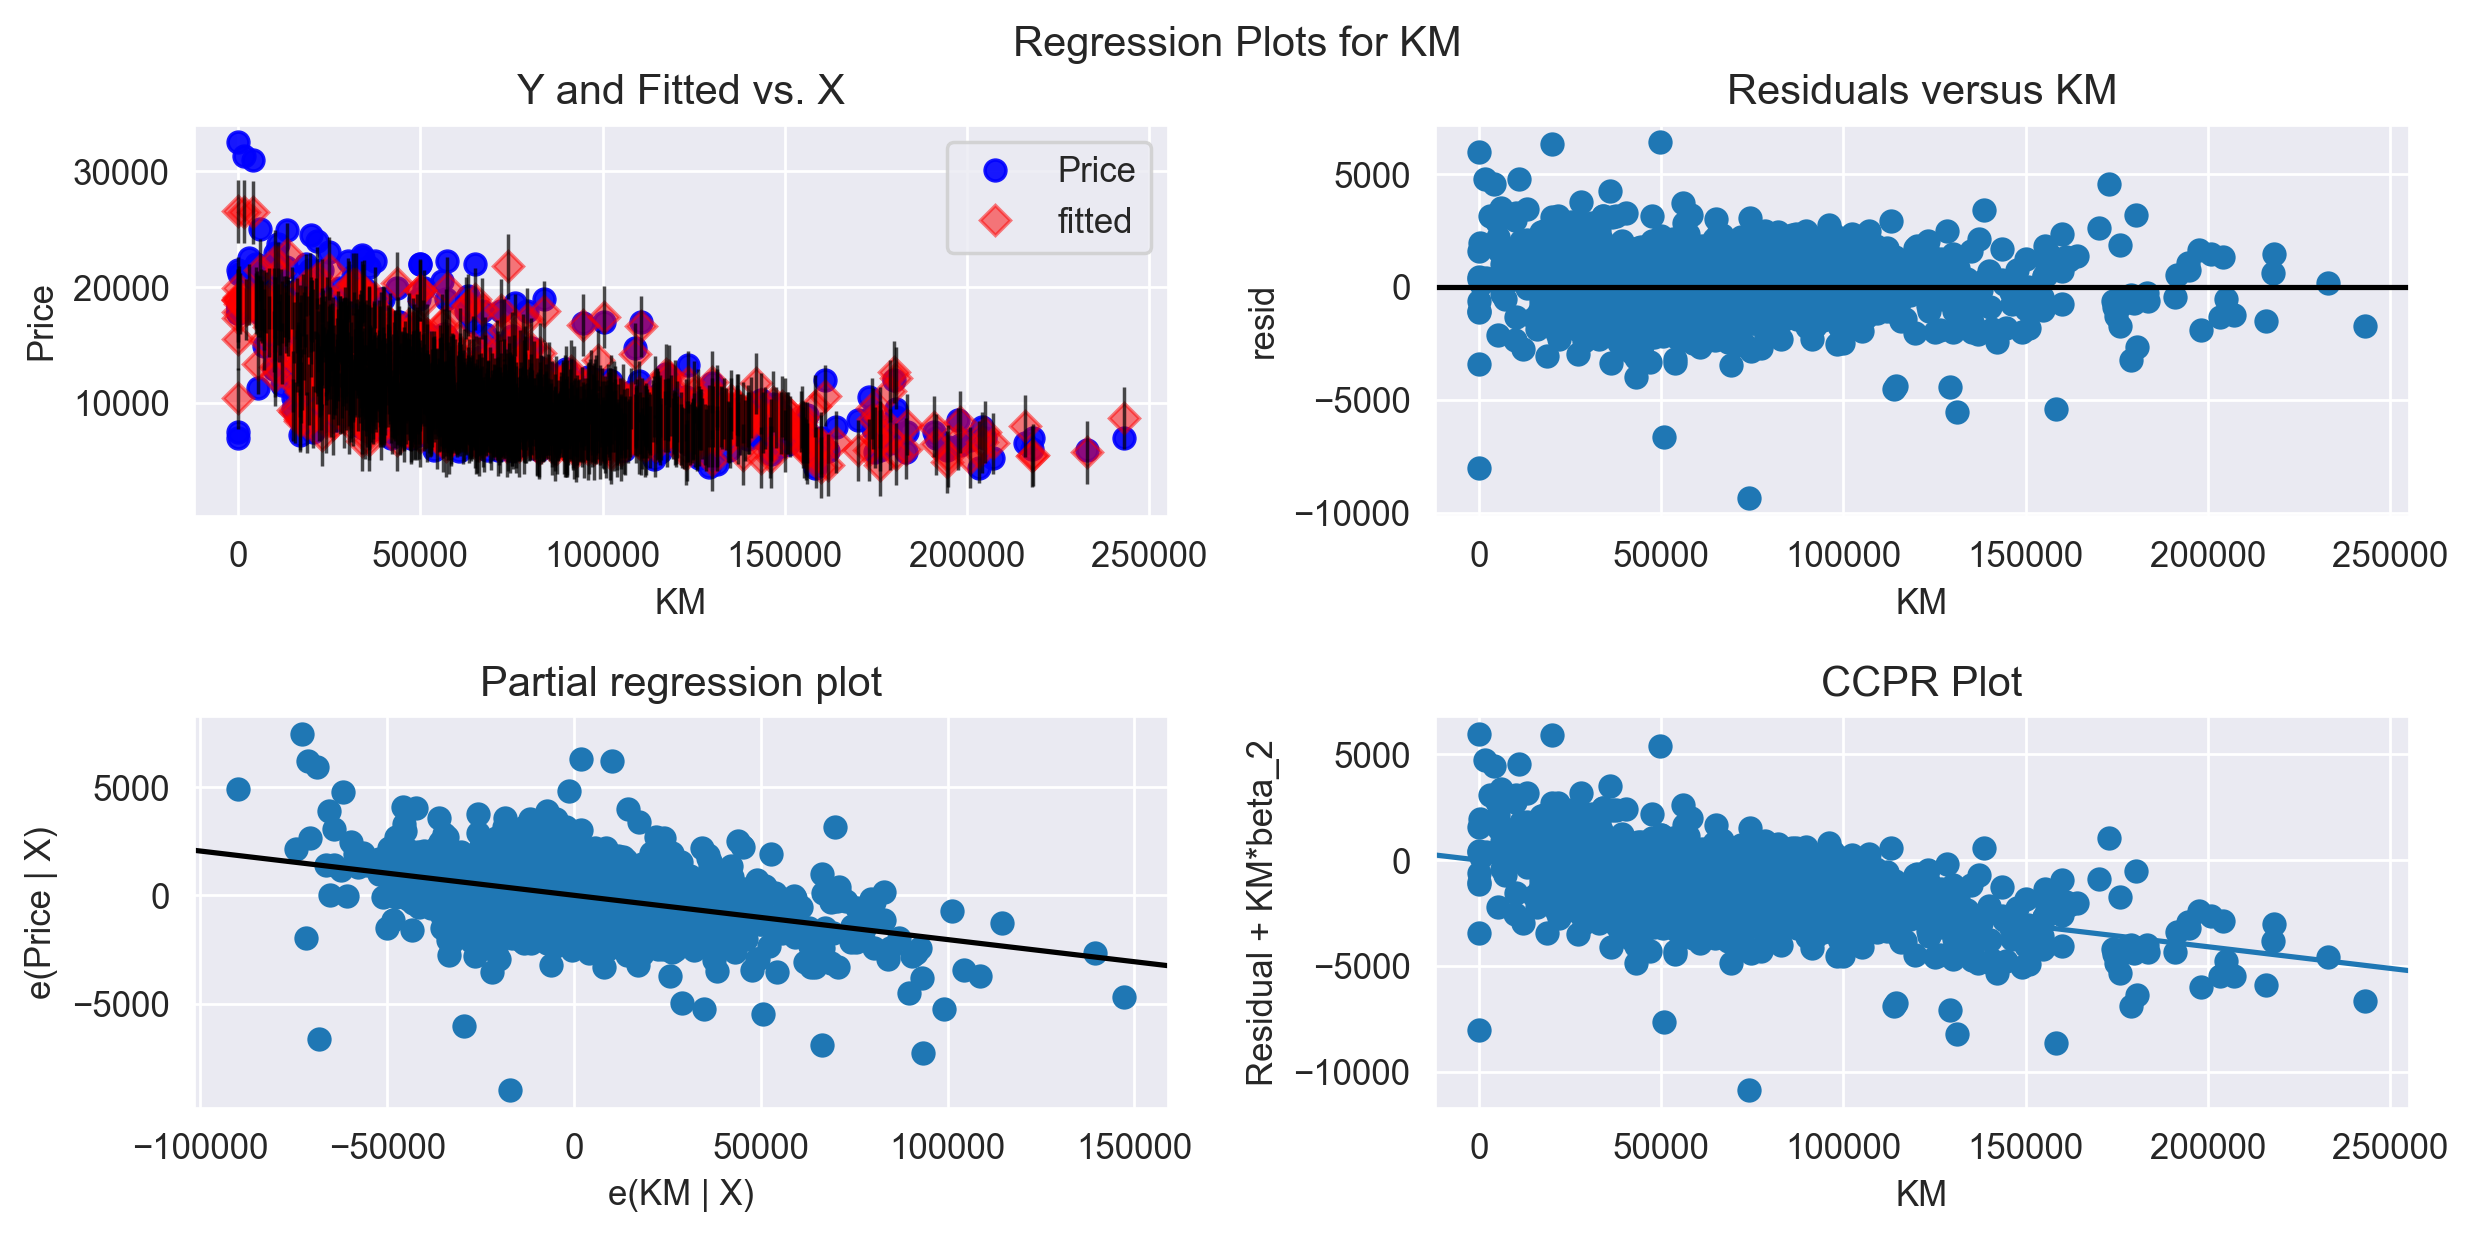

In [68]:
sm.graphics.plot_regress_exog(model, 'KM');

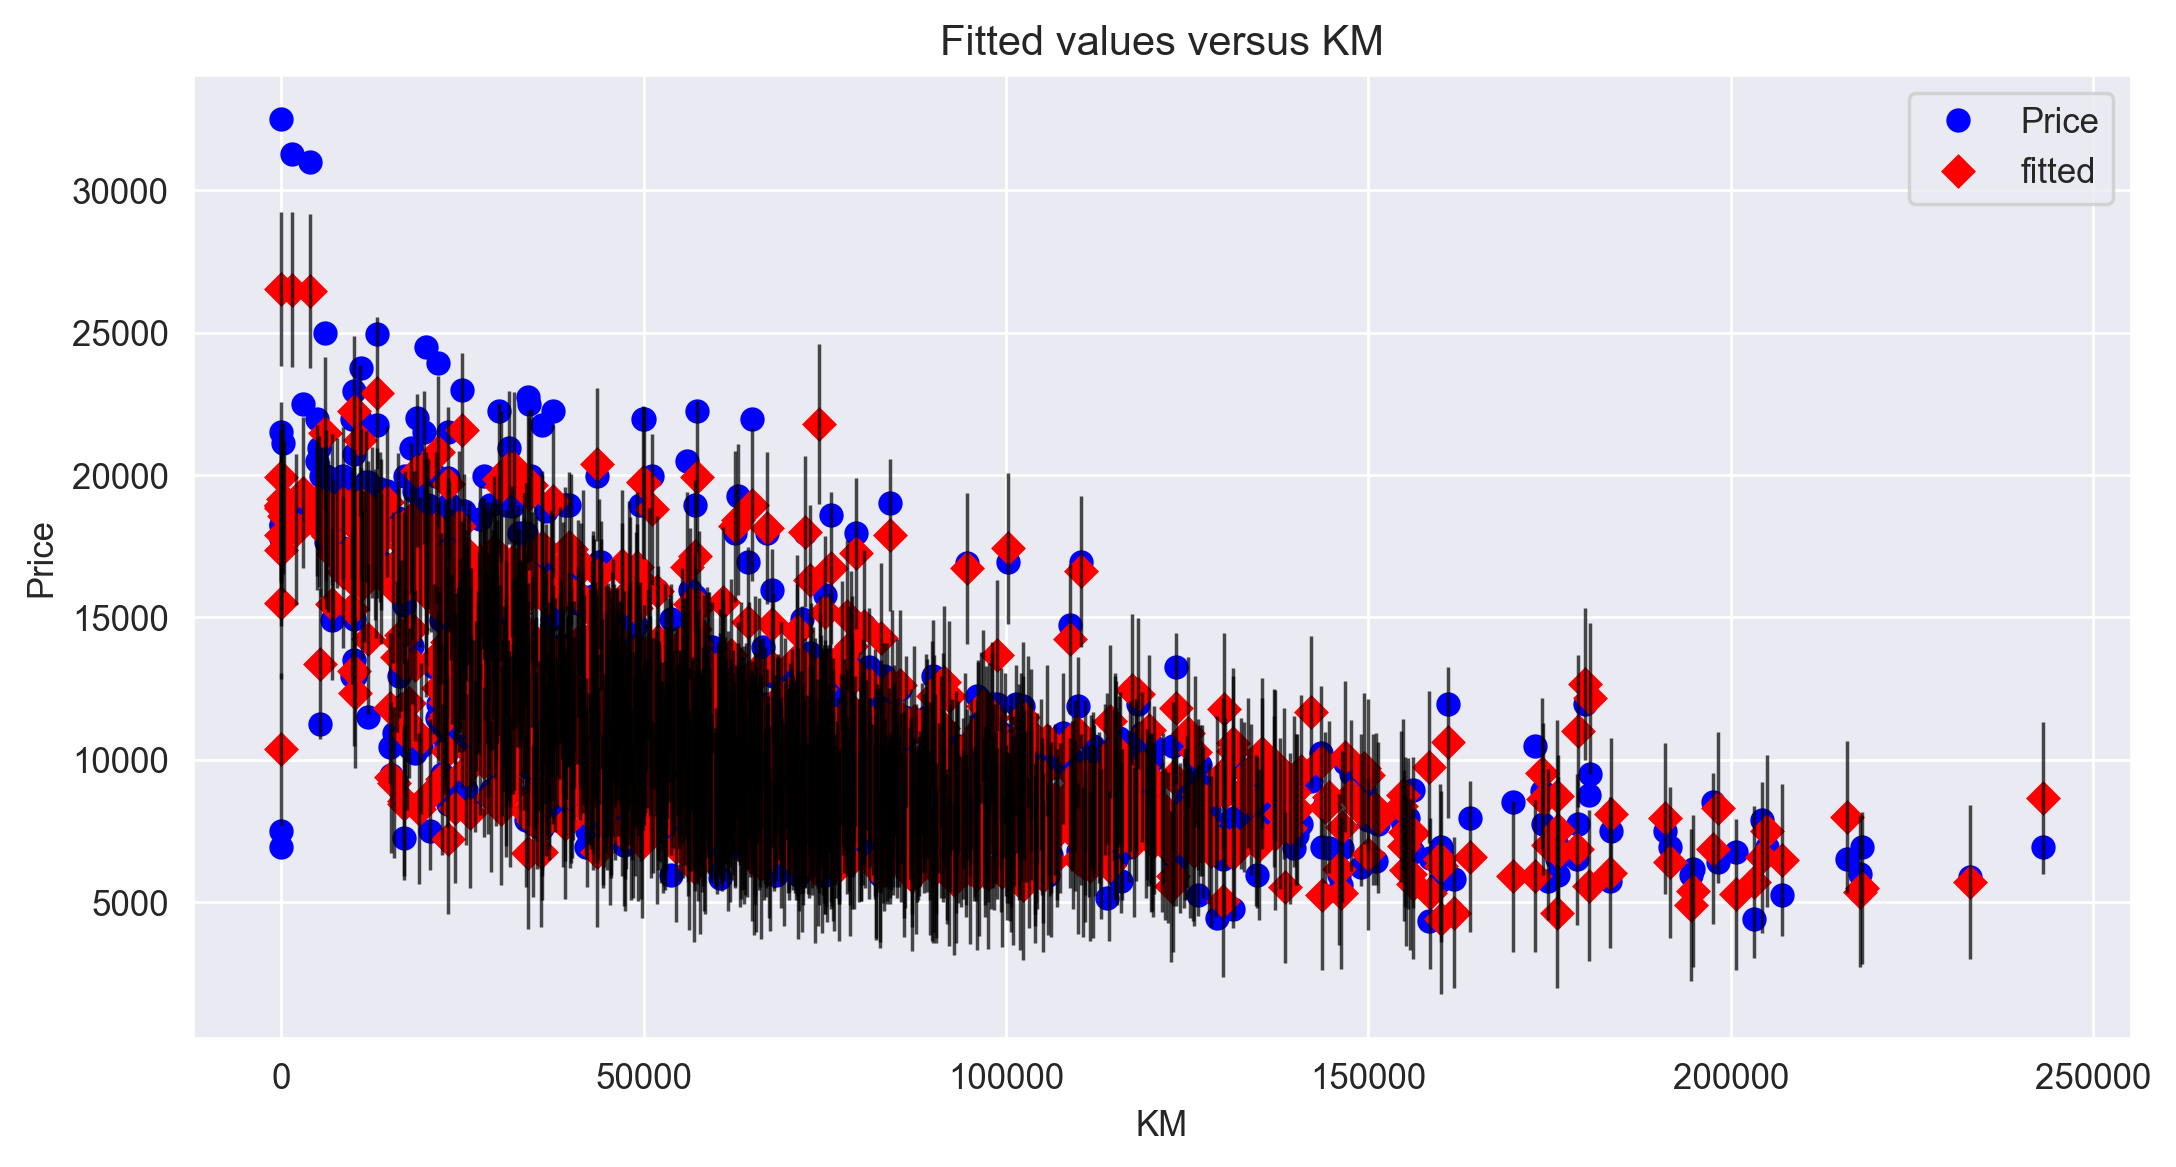

In [69]:
sm.graphics.plot_fit(model, 'KM');

In [70]:
# Here is also the same, some difference is present

In [71]:
# HP

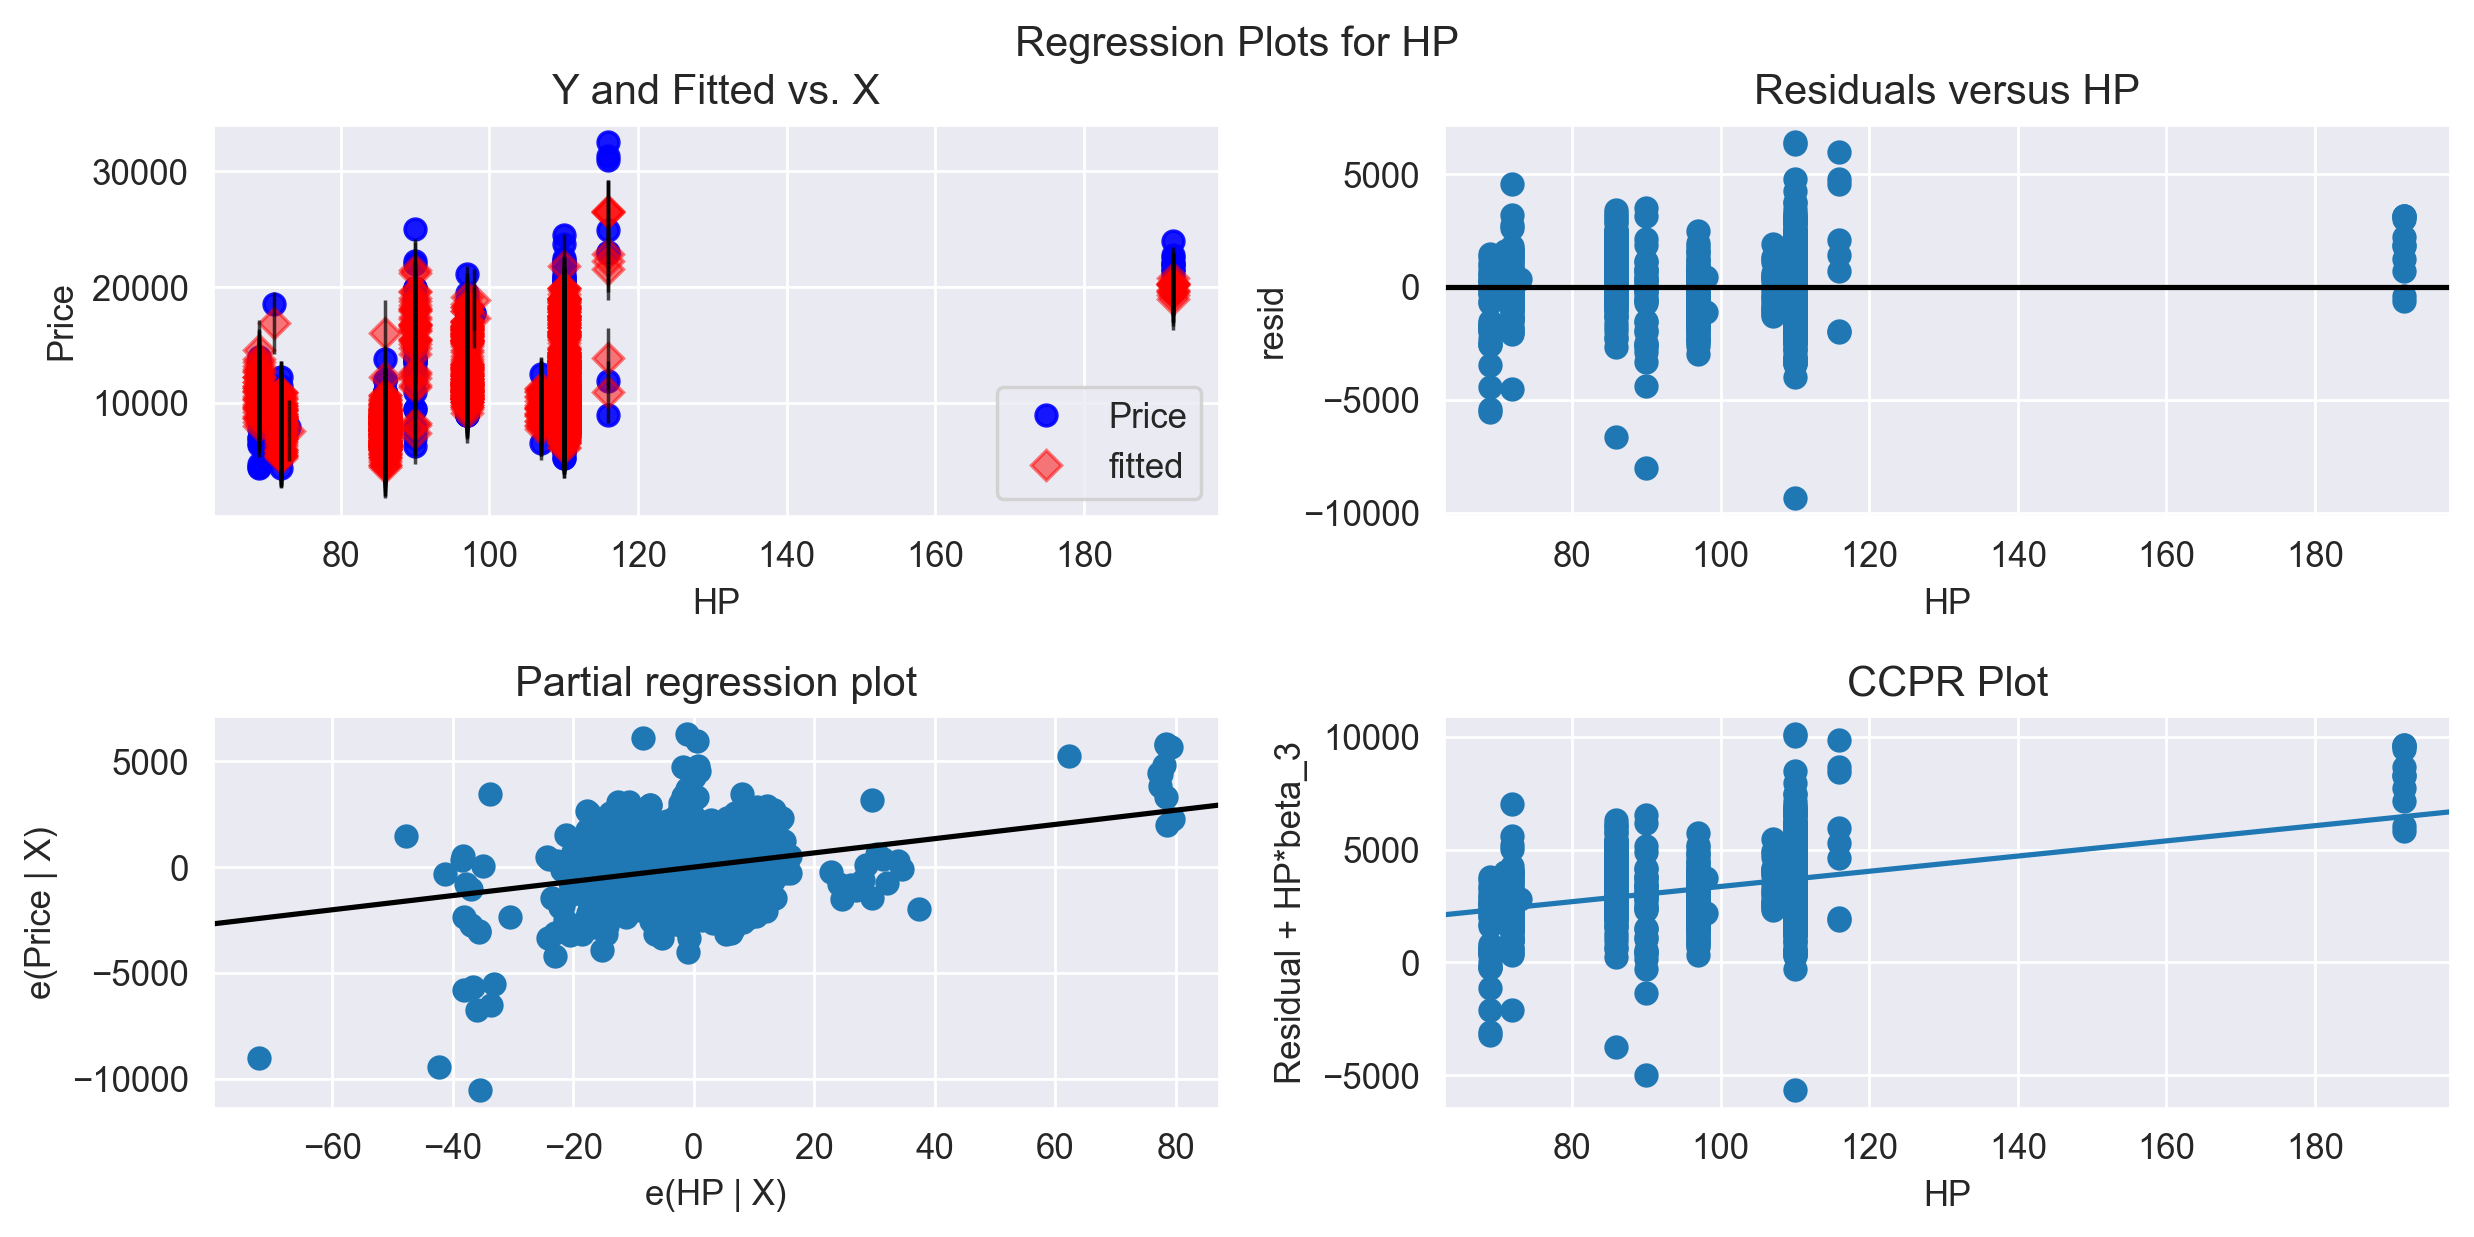

In [72]:
sm.graphics.plot_regress_exog(model, 'HP');

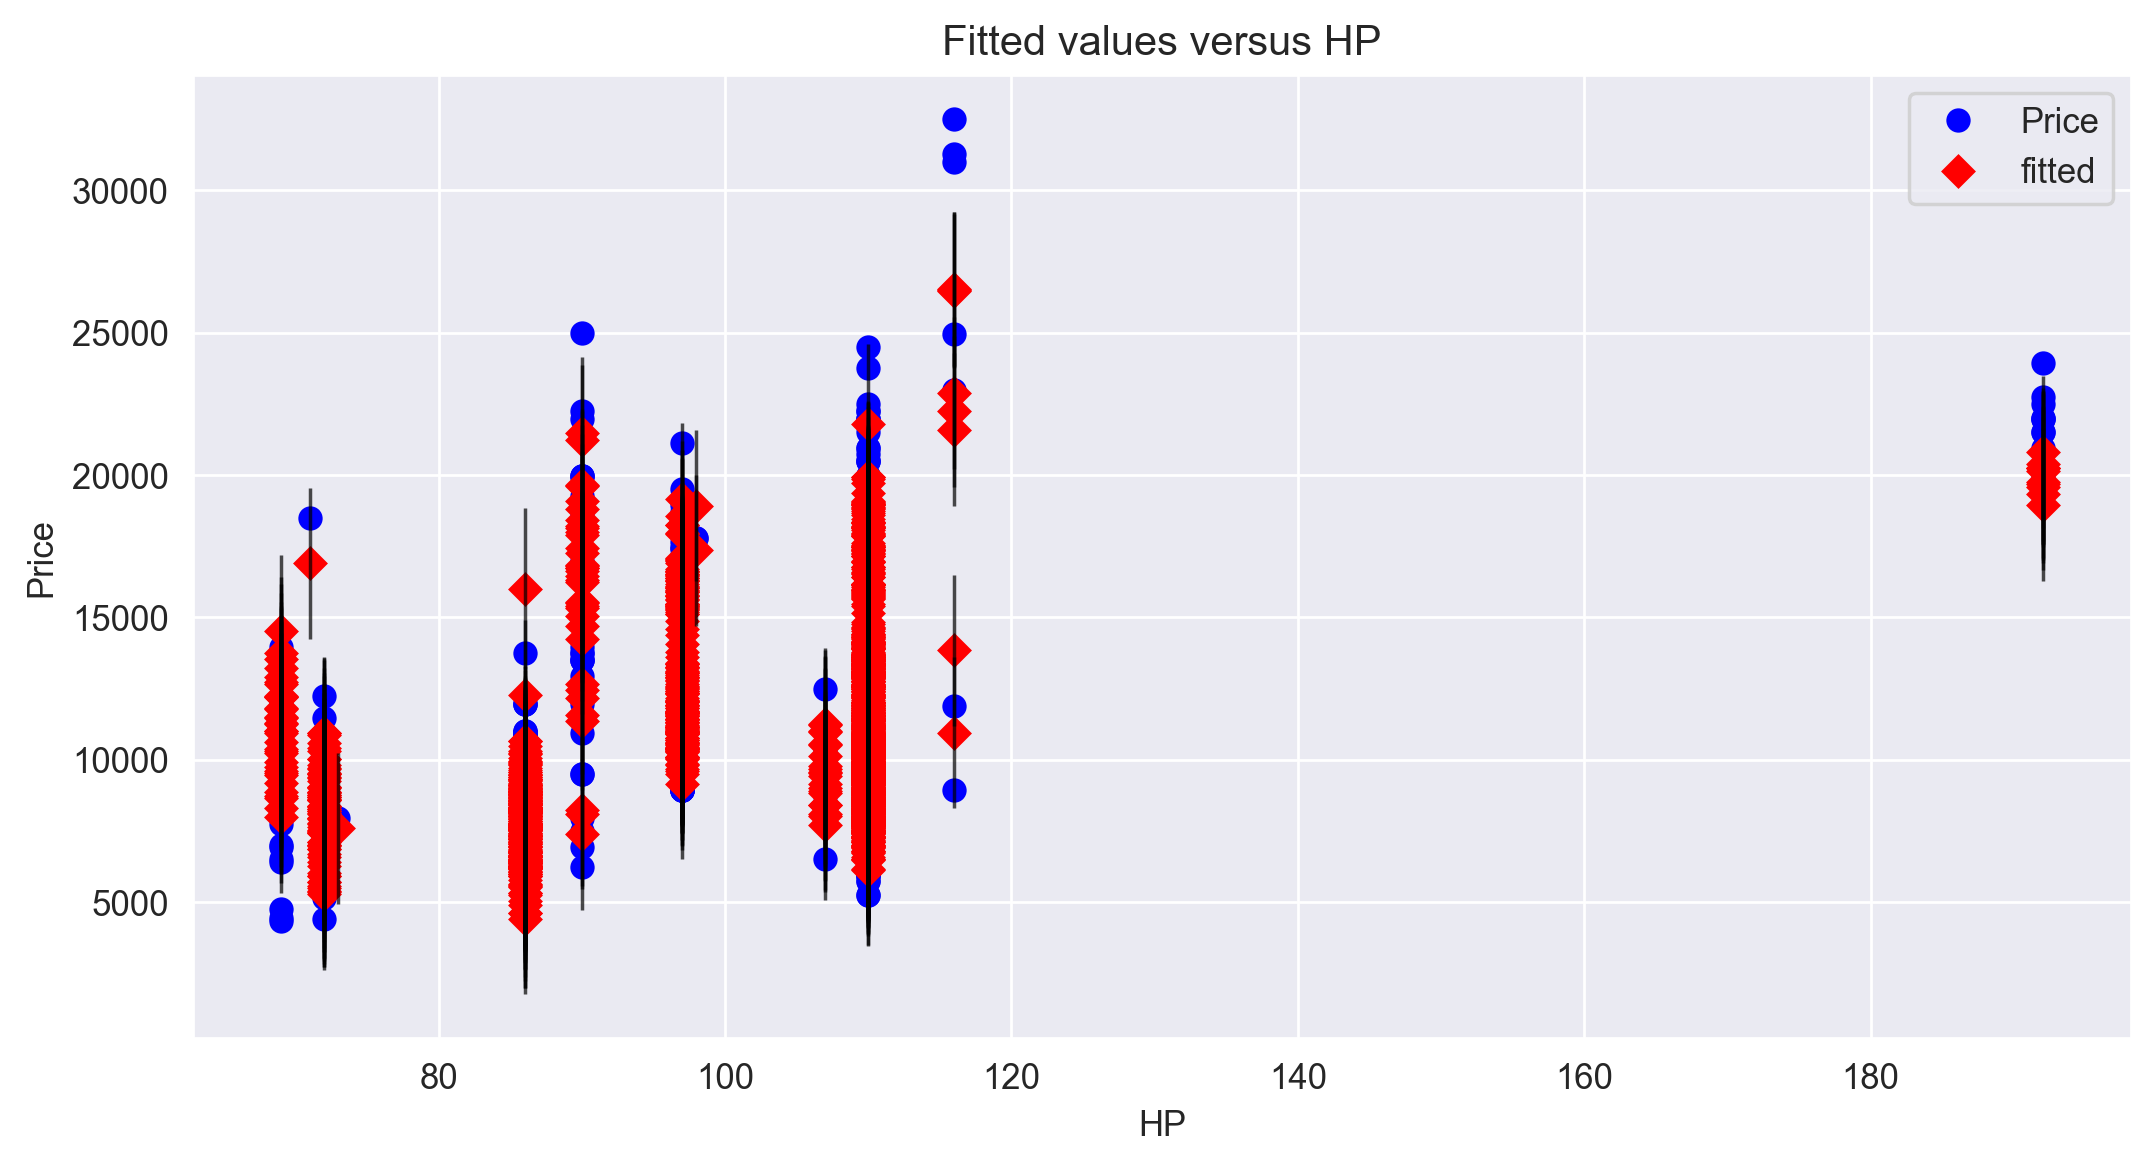

In [73]:
sm.graphics.plot_fit(model, 'HP');

In [74]:
# Here the difference is moderate.

In [75]:
# cc

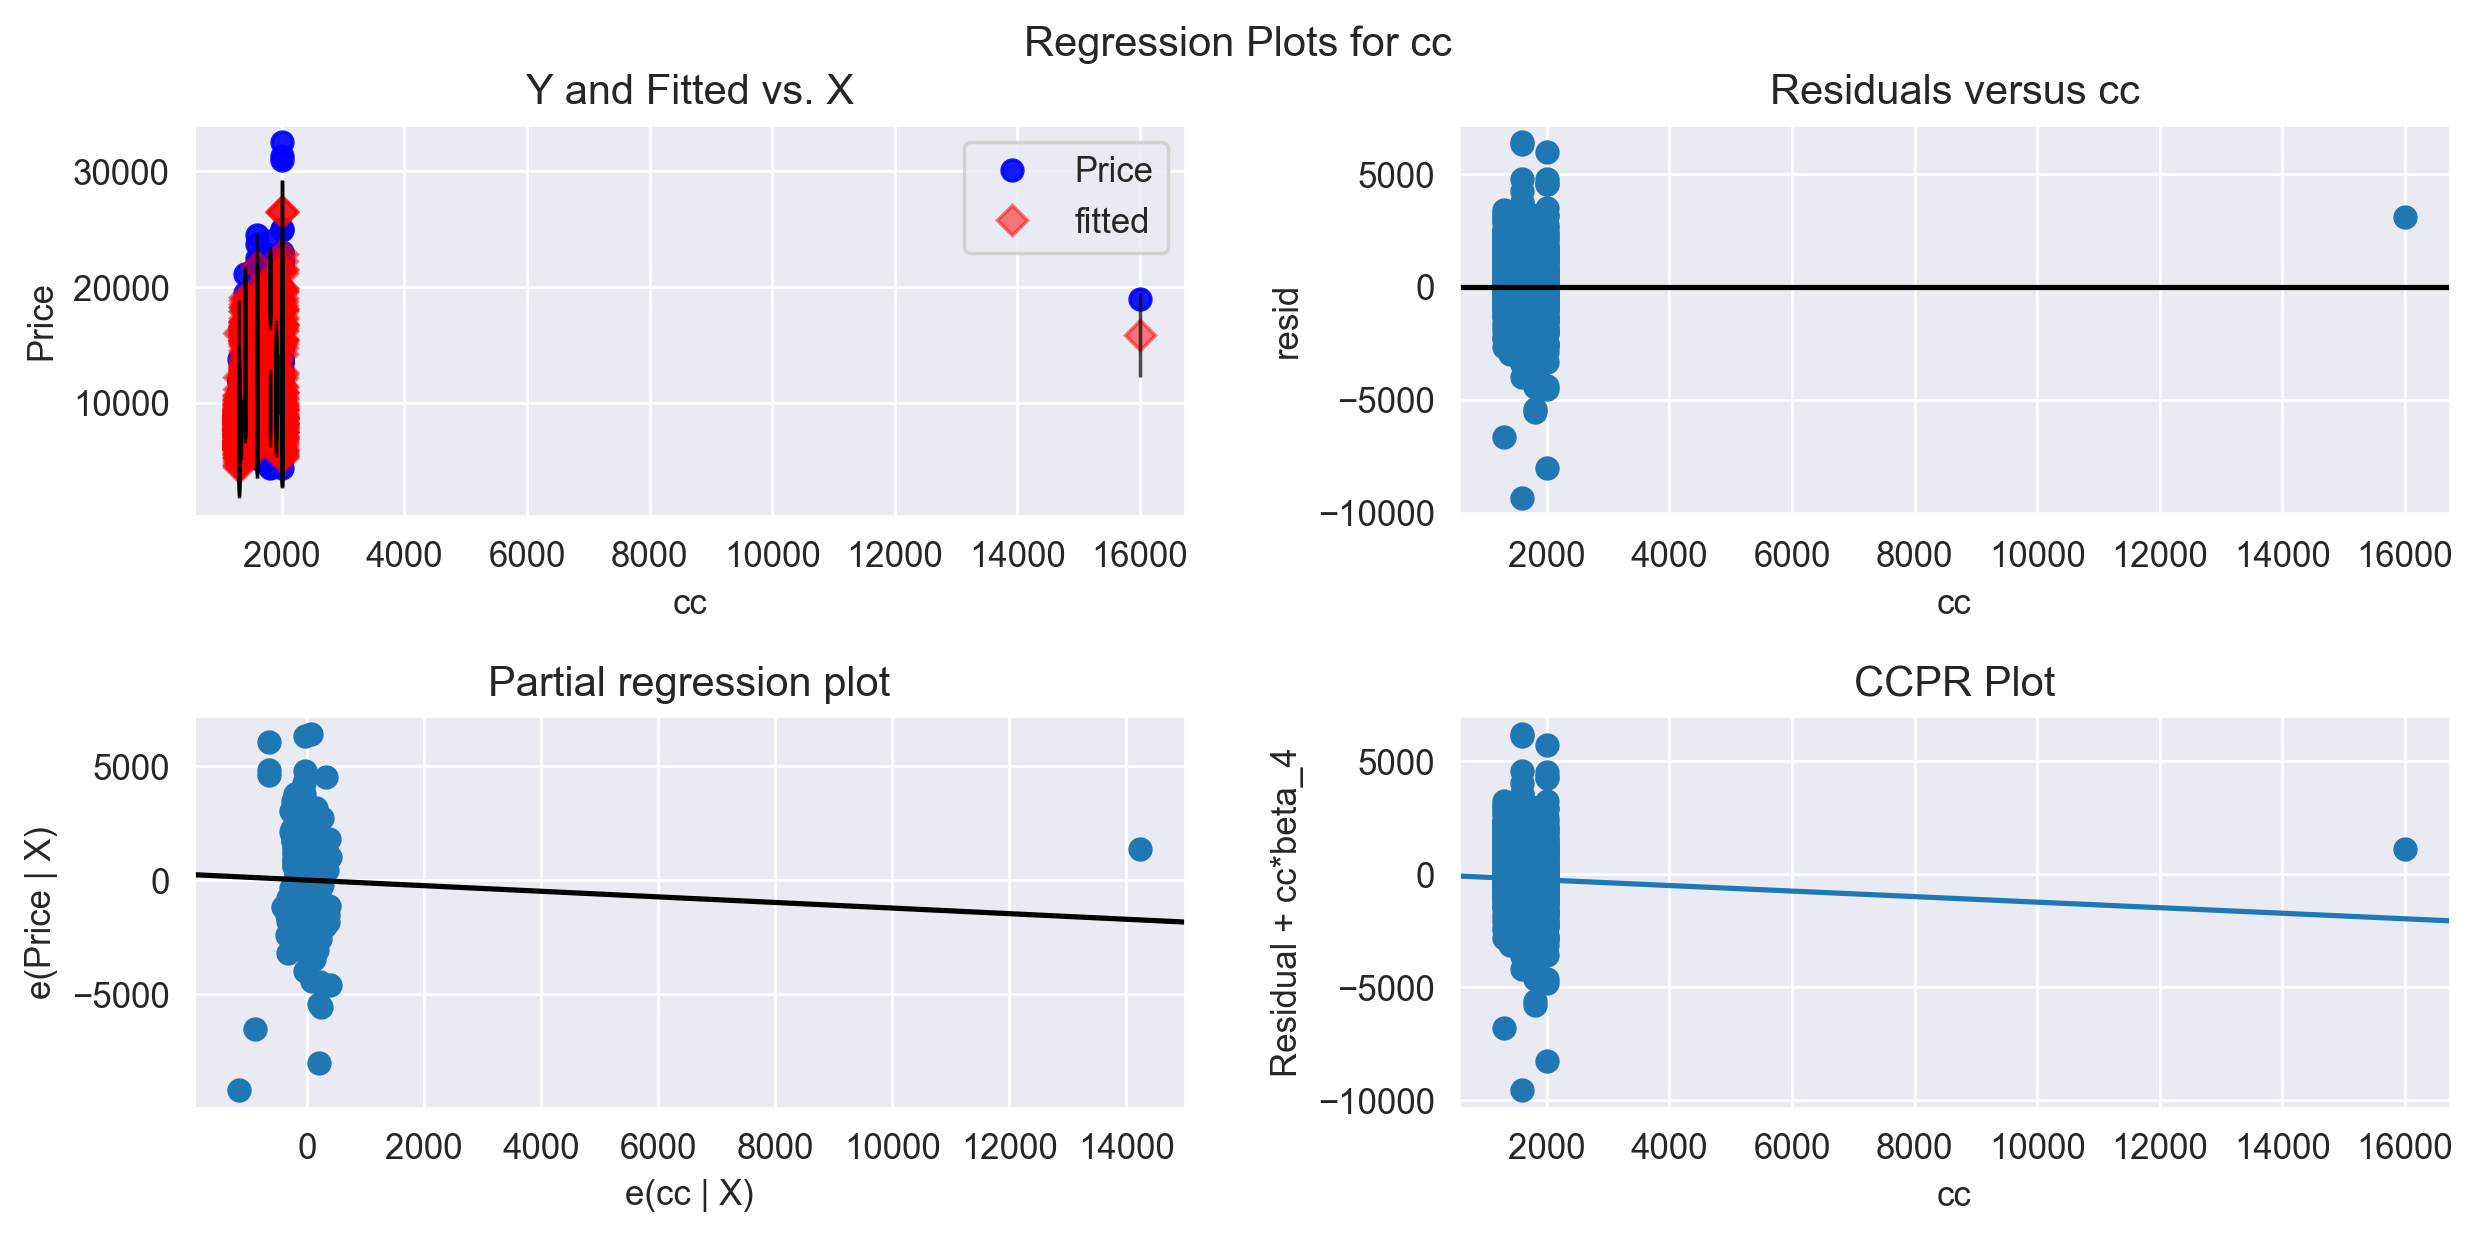

In [76]:
sm.graphics.plot_regress_exog(model, 'cc');

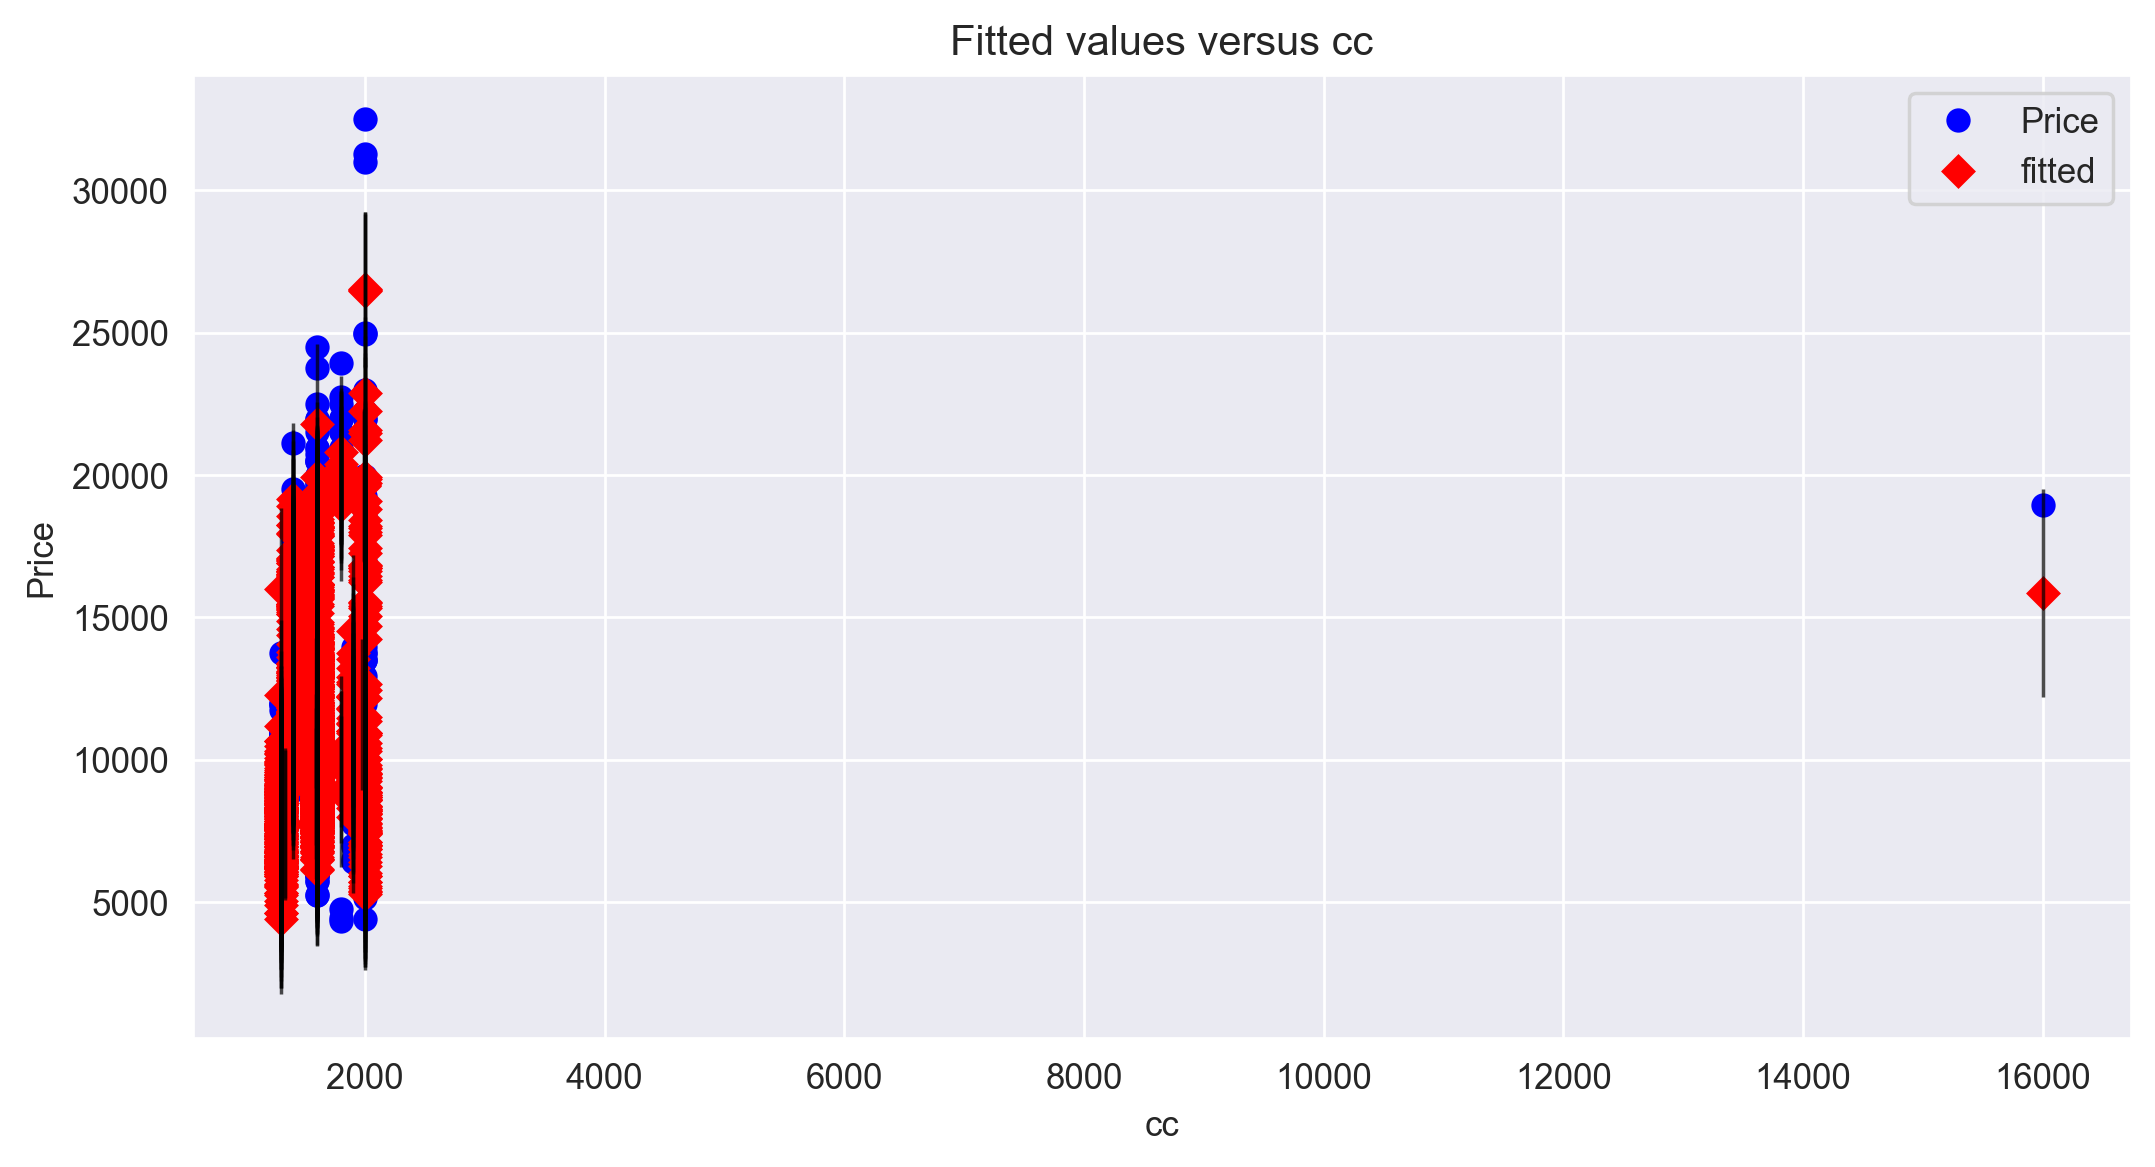

In [77]:
sm.graphics.plot_fit(model, 'cc');

In [78]:
# Here also the difference is moderate

In [79]:
# Doors

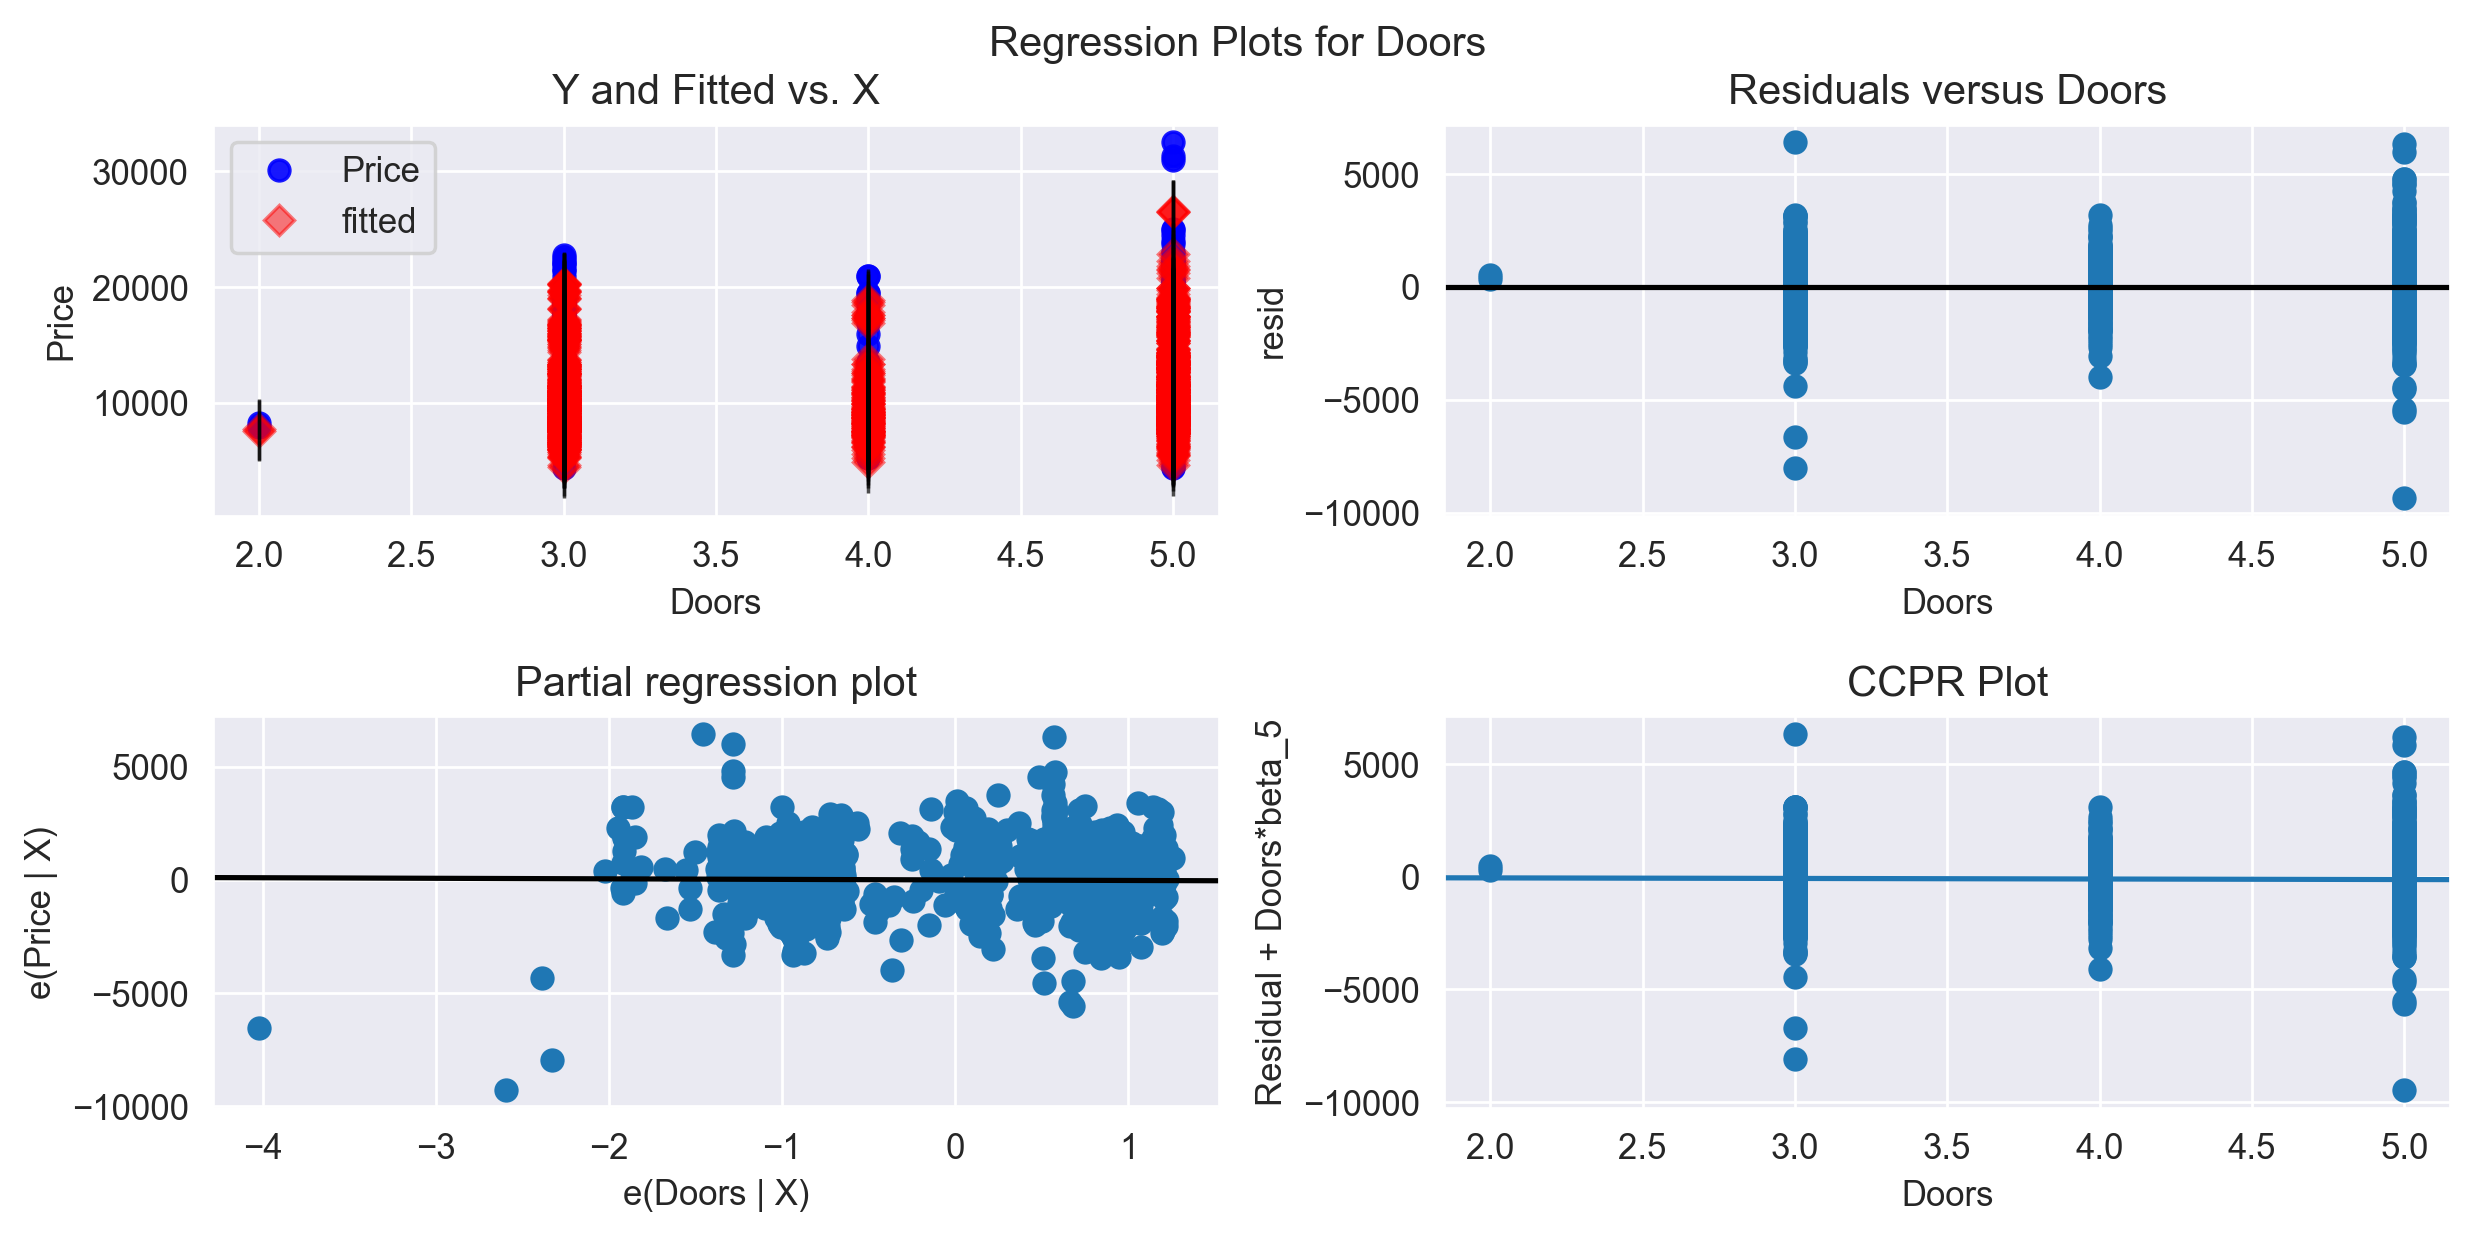

In [80]:
sm.graphics.plot_regress_exog(model, 'Doors');

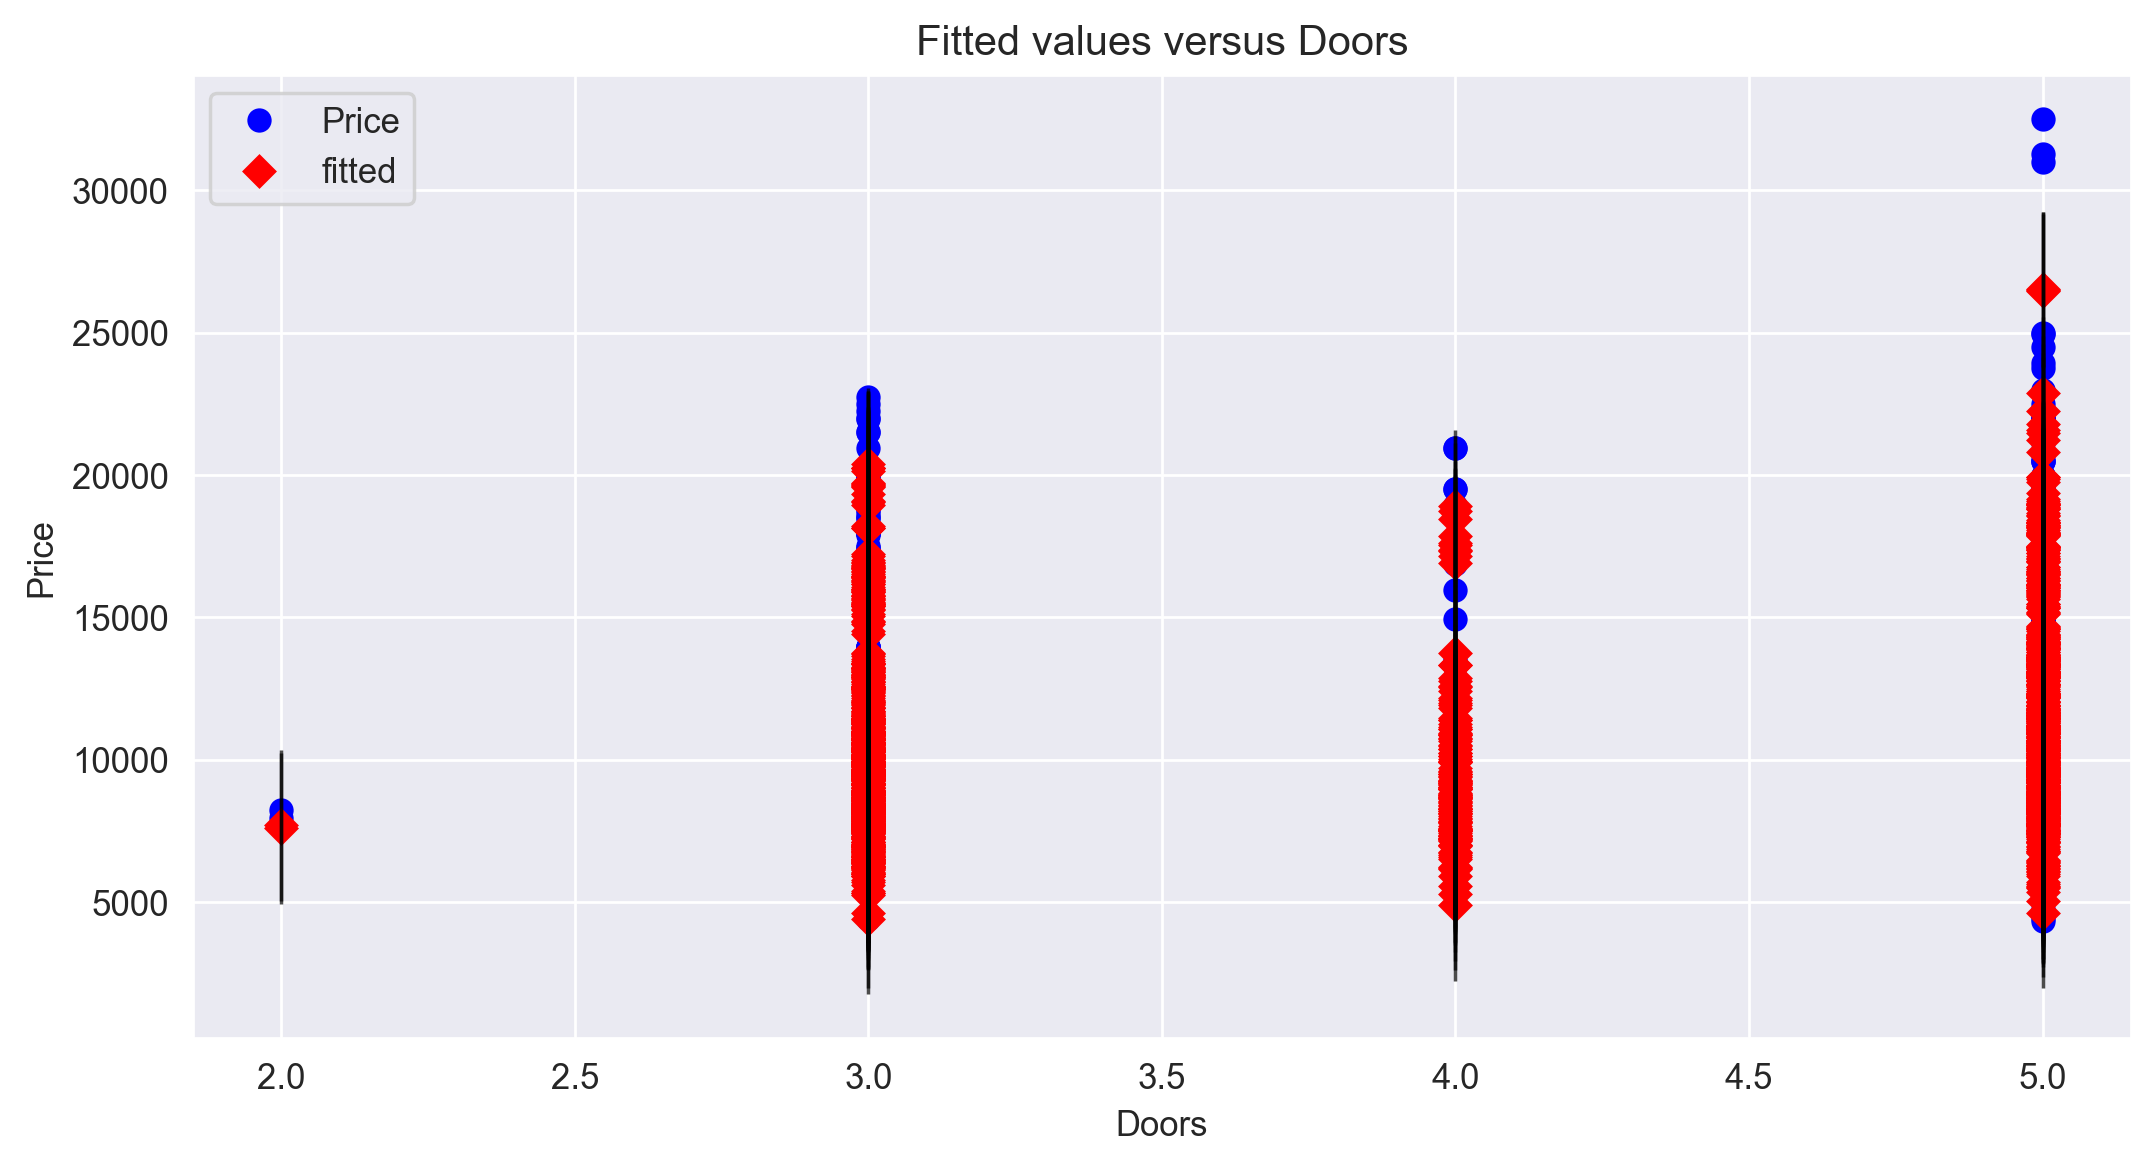

In [81]:
sm.graphics.plot_fit(model, 'Doors');

In [82]:
# Here we can see the difference is very less

In [83]:
# Quarterly_Tax

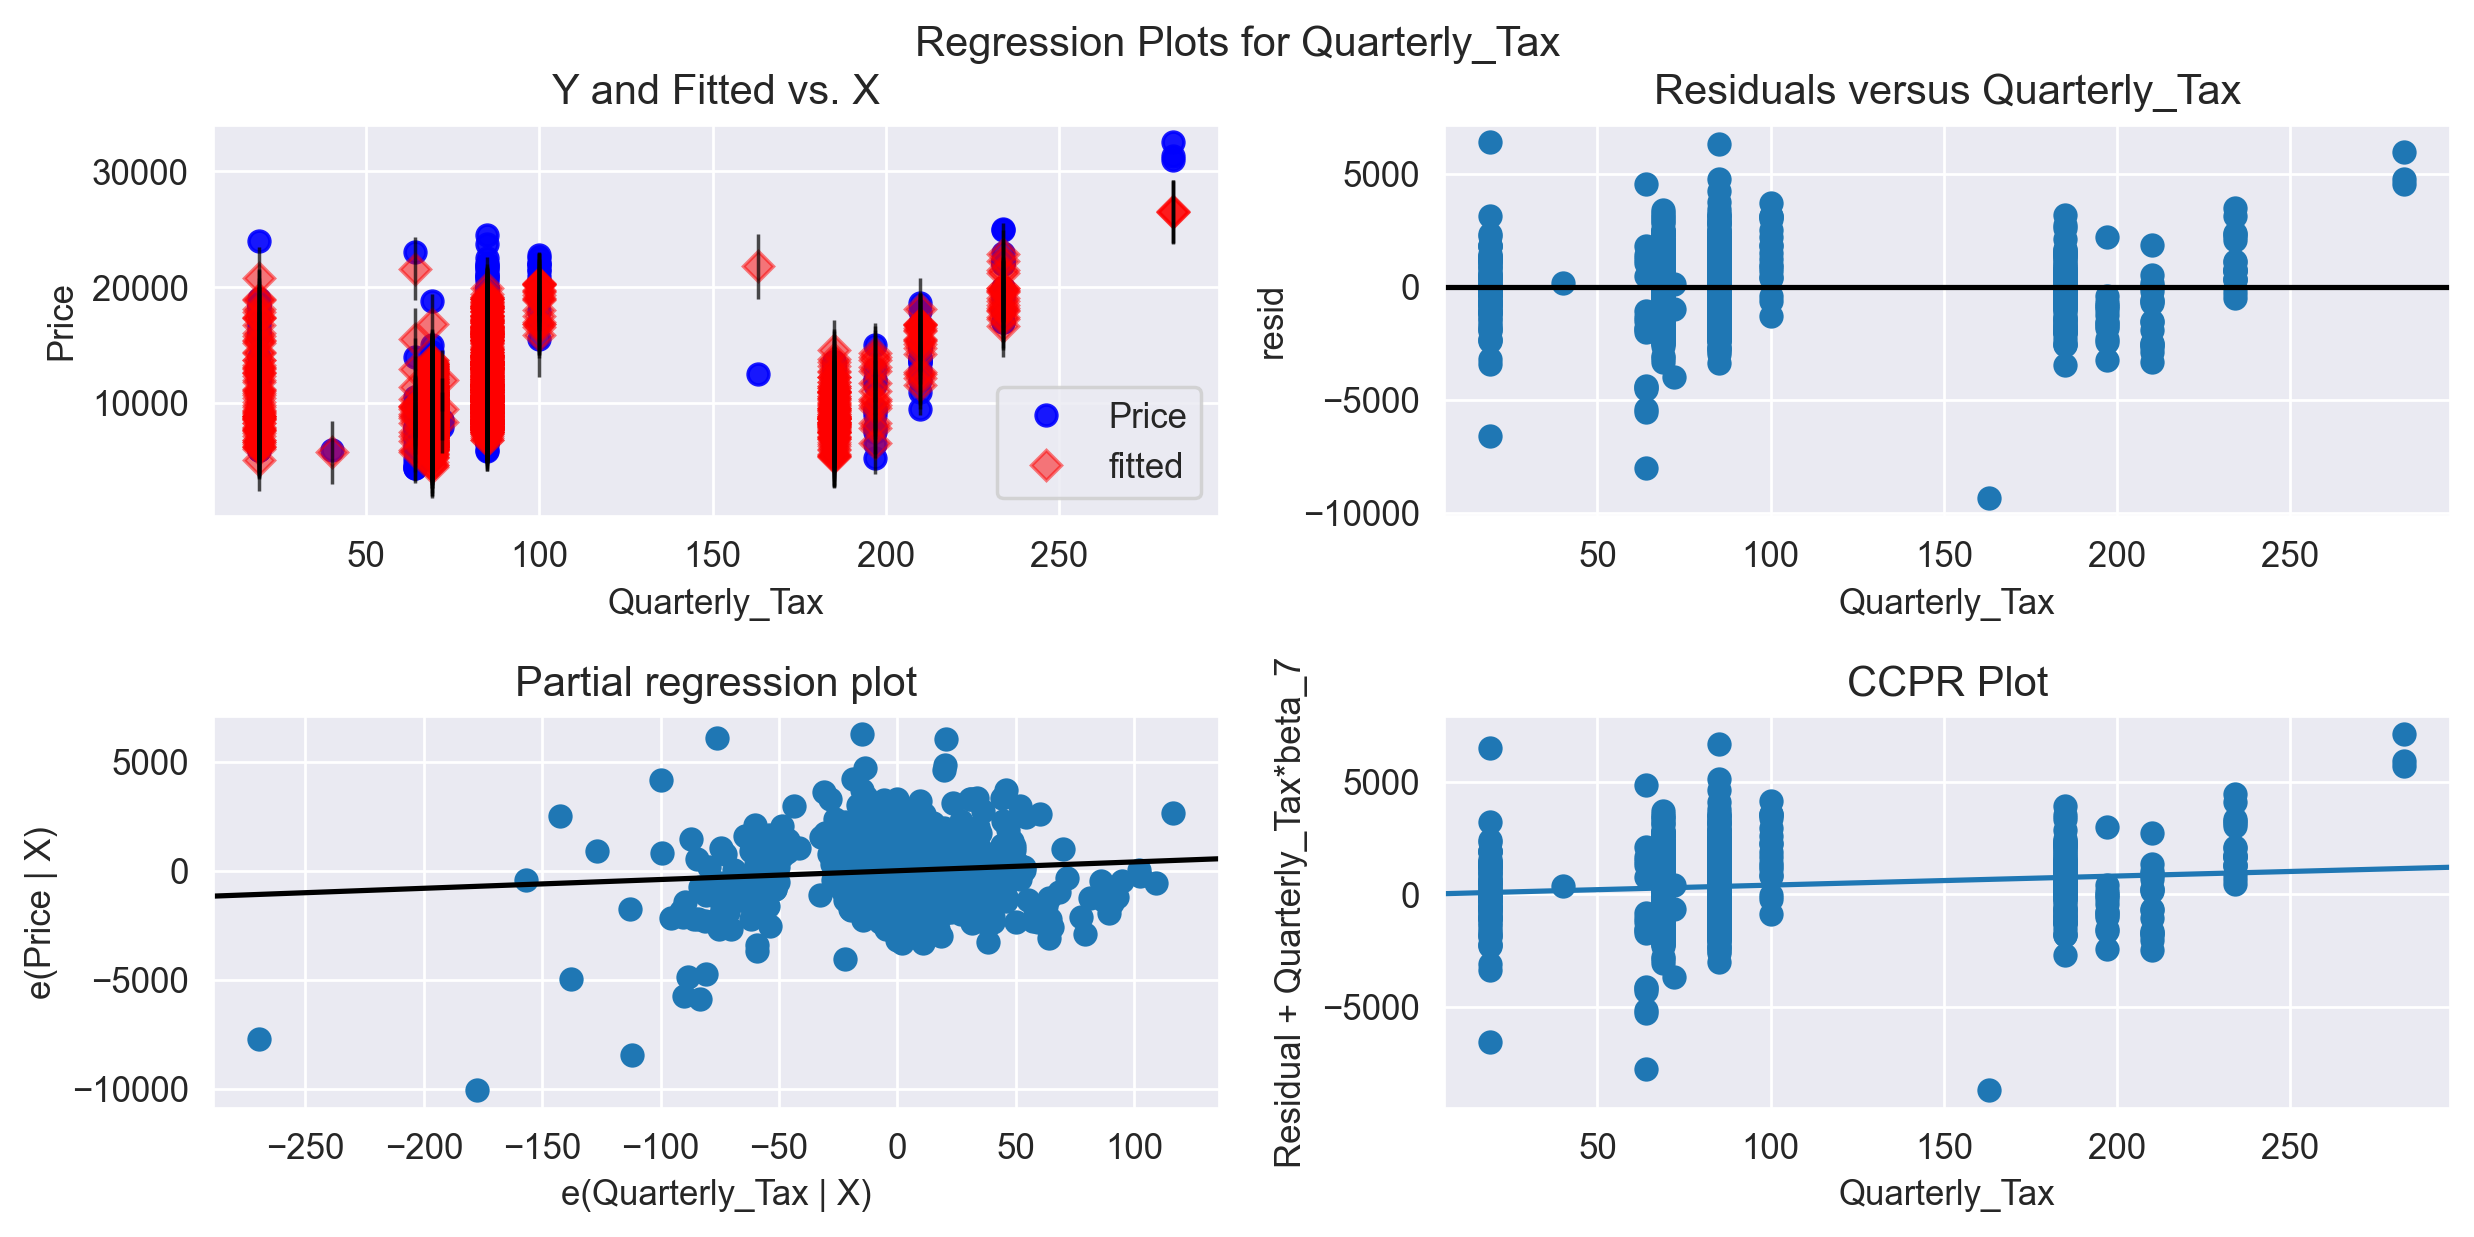

In [84]:
sm.graphics.plot_regress_exog(model, 'Quarterly_Tax');

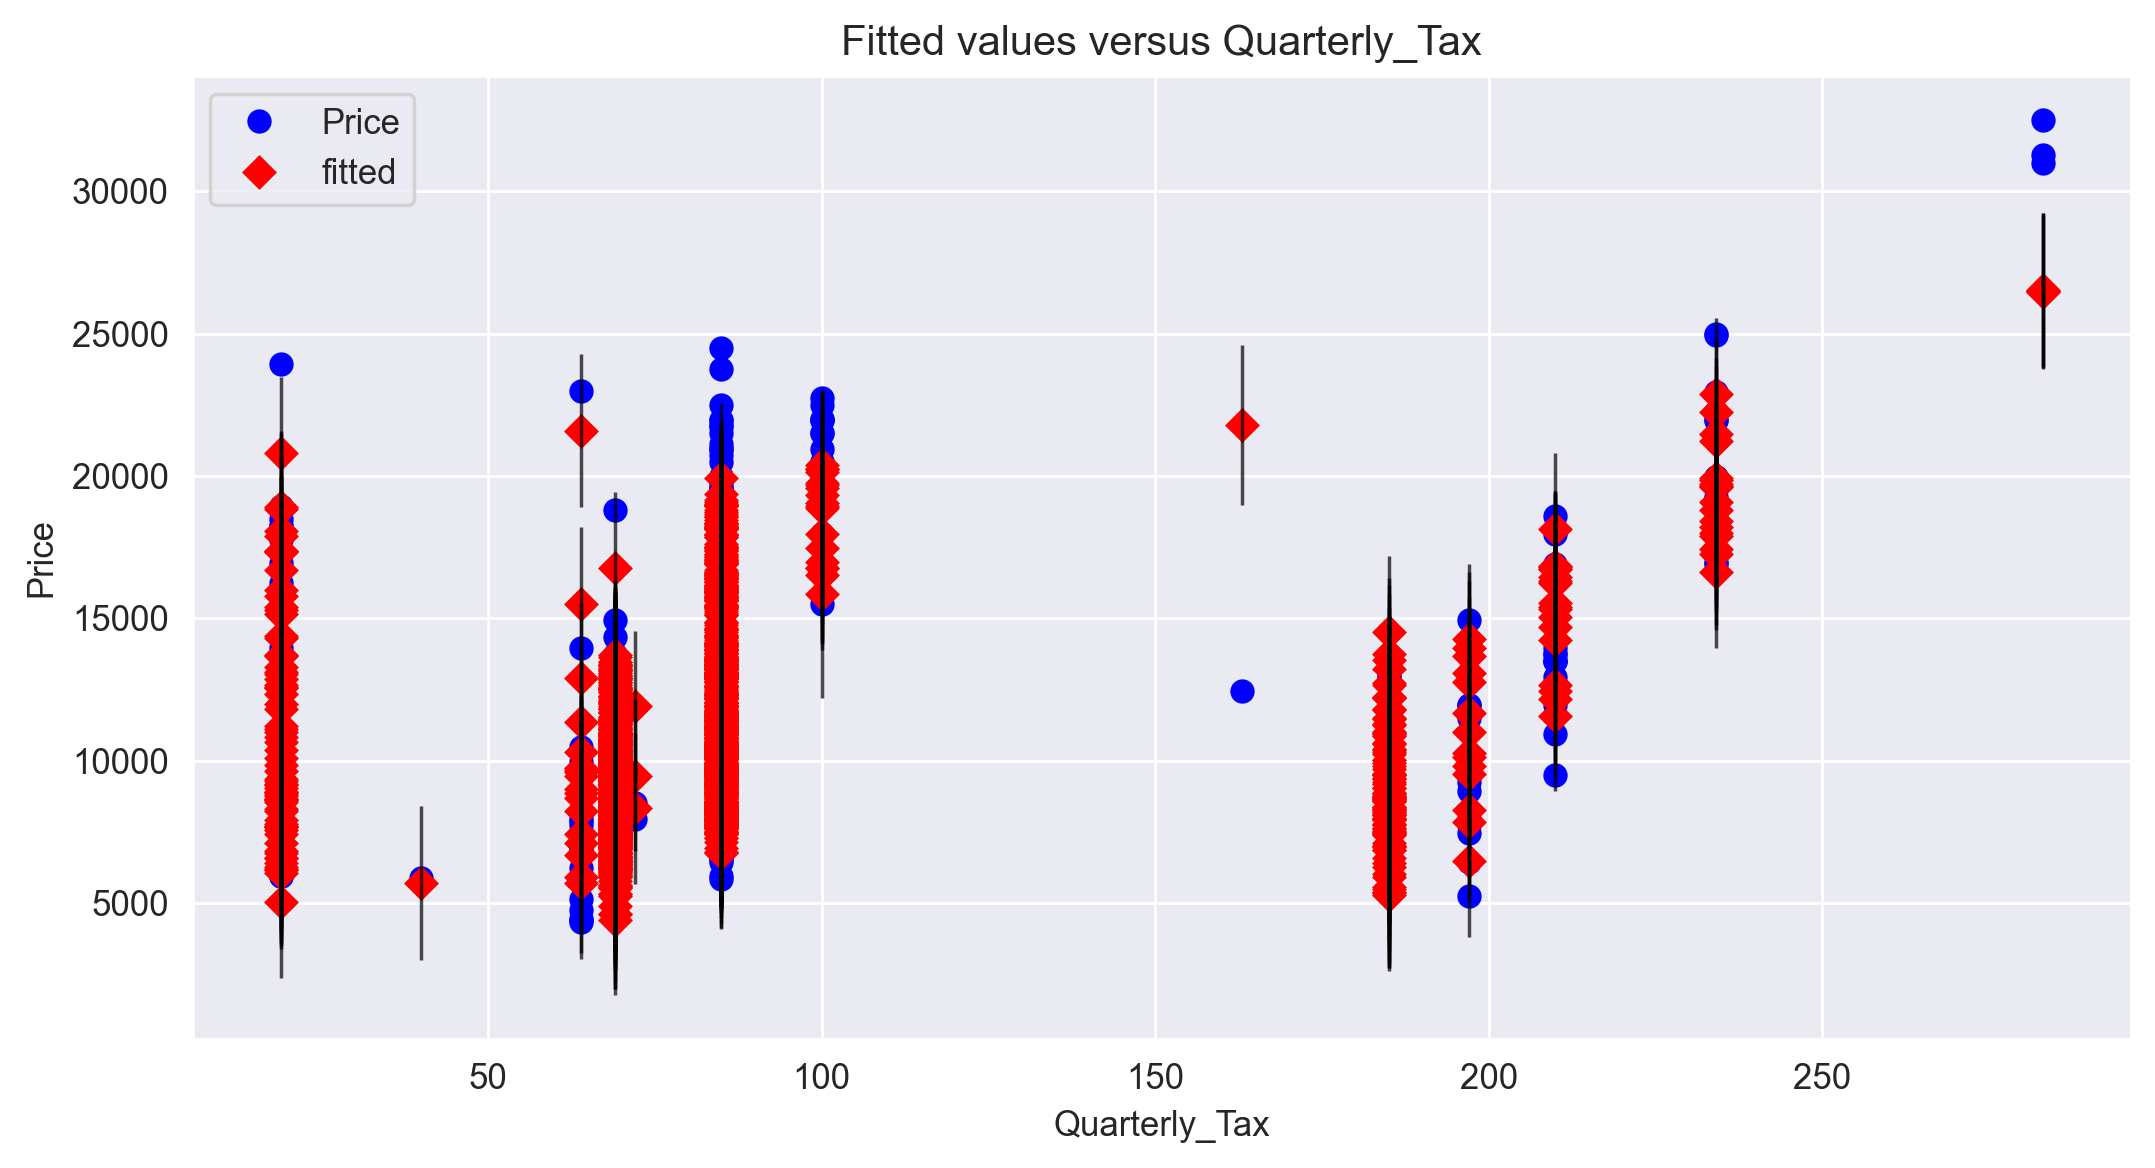

In [85]:
sm.graphics.plot_fit(model, 'Quarterly_Tax');

In [86]:
# Again the difference is moderate

In [87]:
# Weight

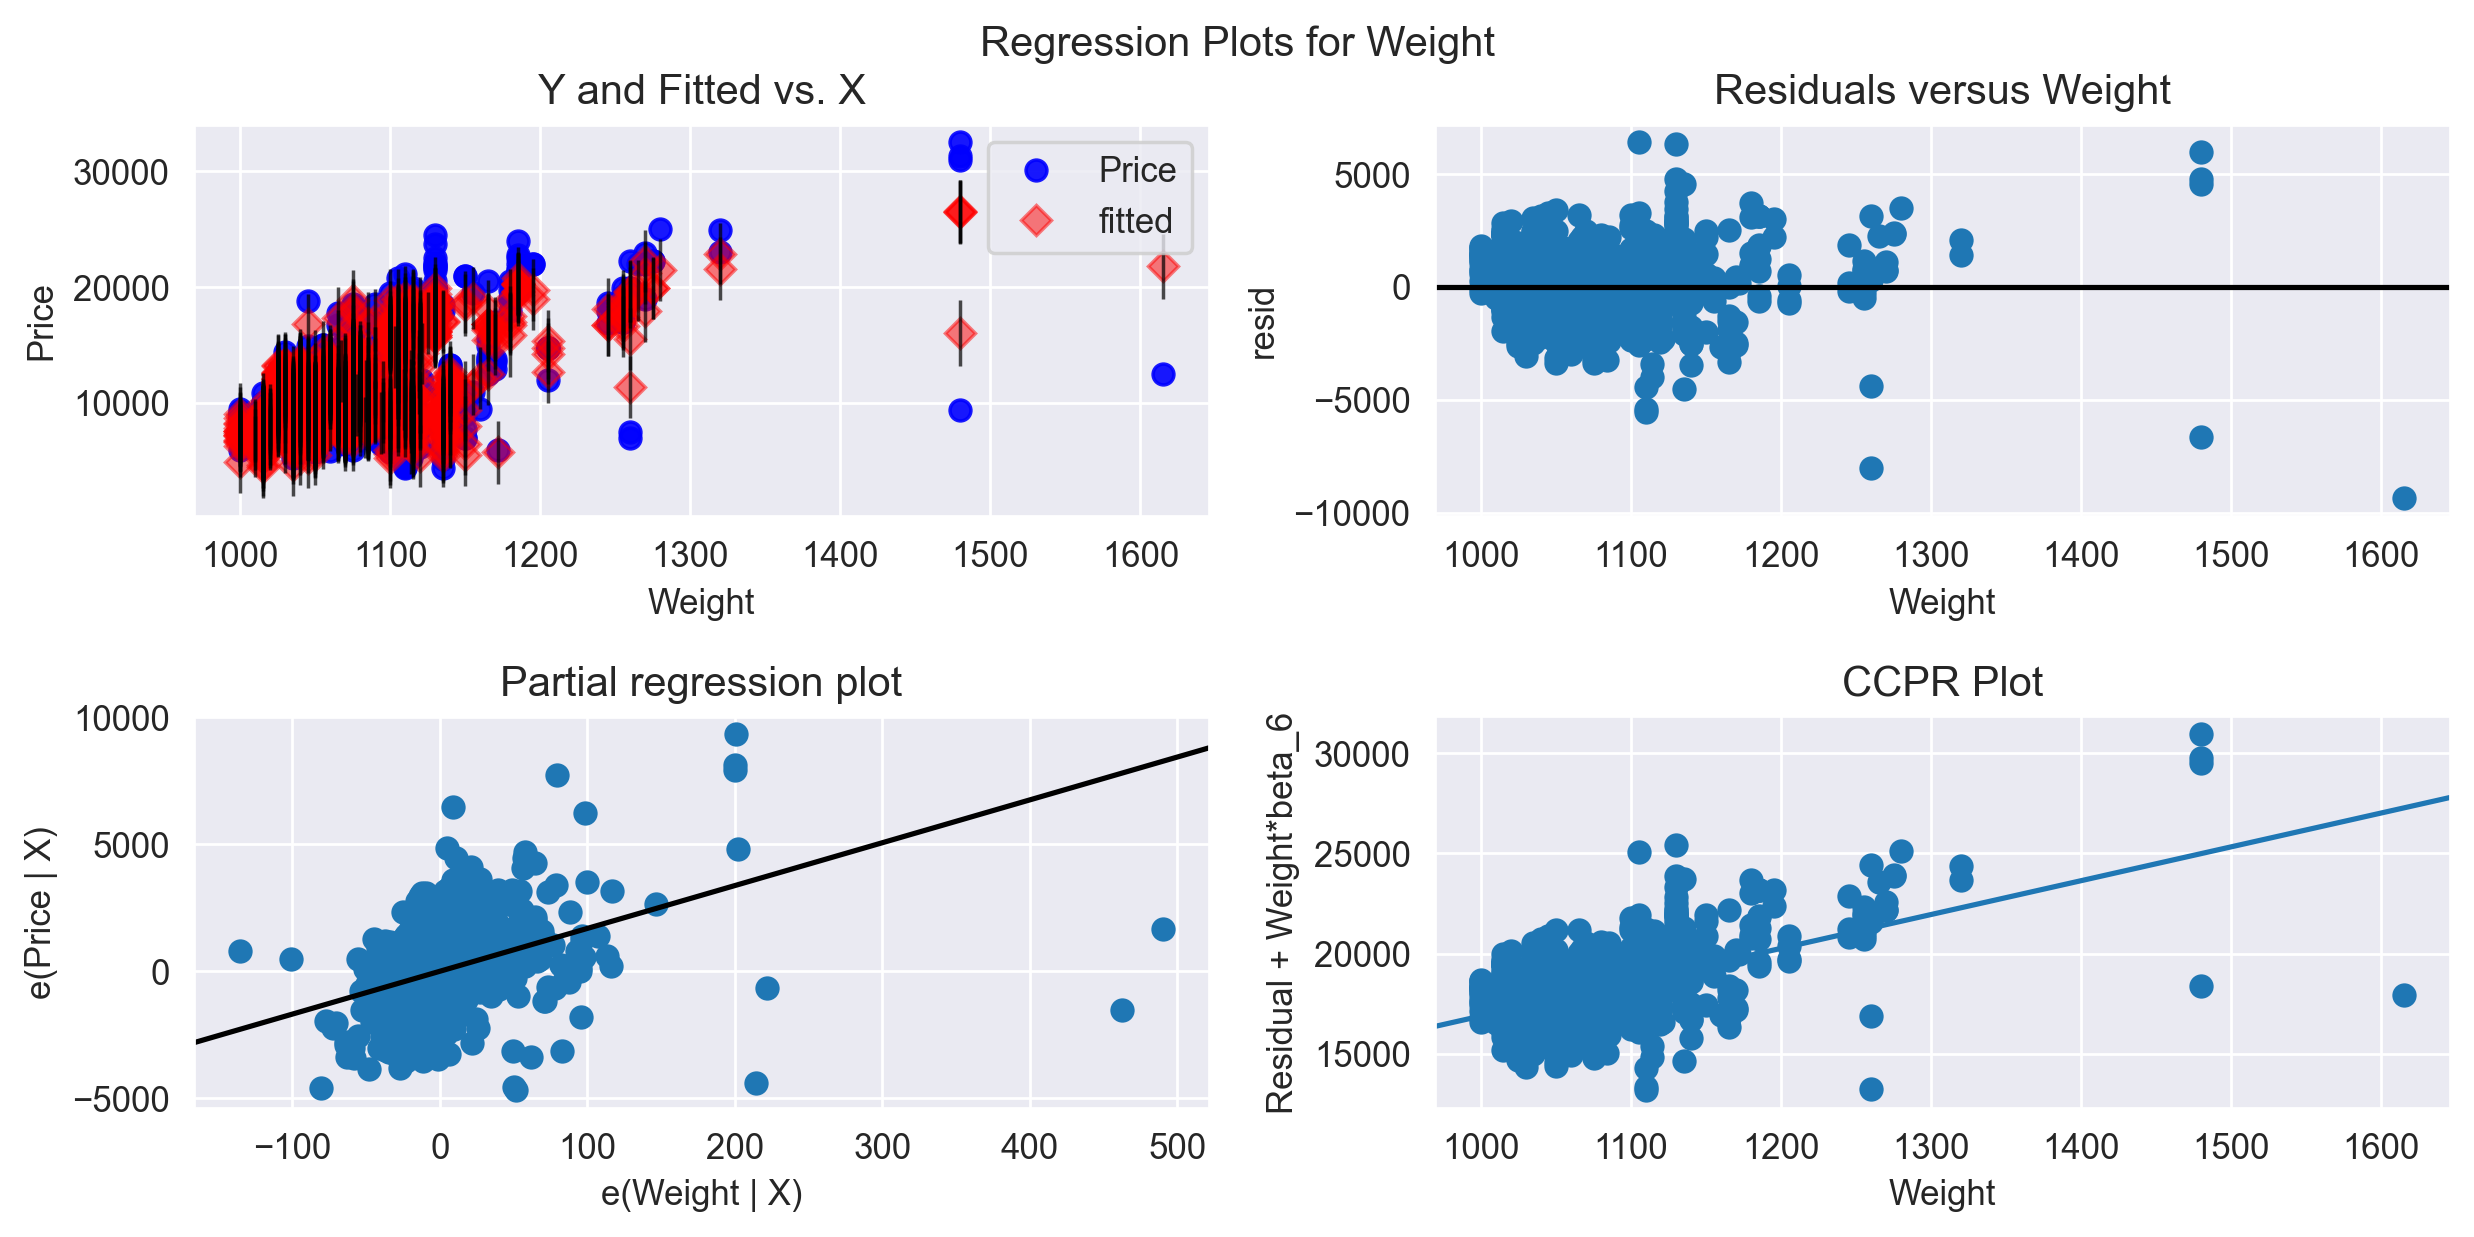

In [88]:
sm.graphics.plot_regress_exog(model, 'Weight');

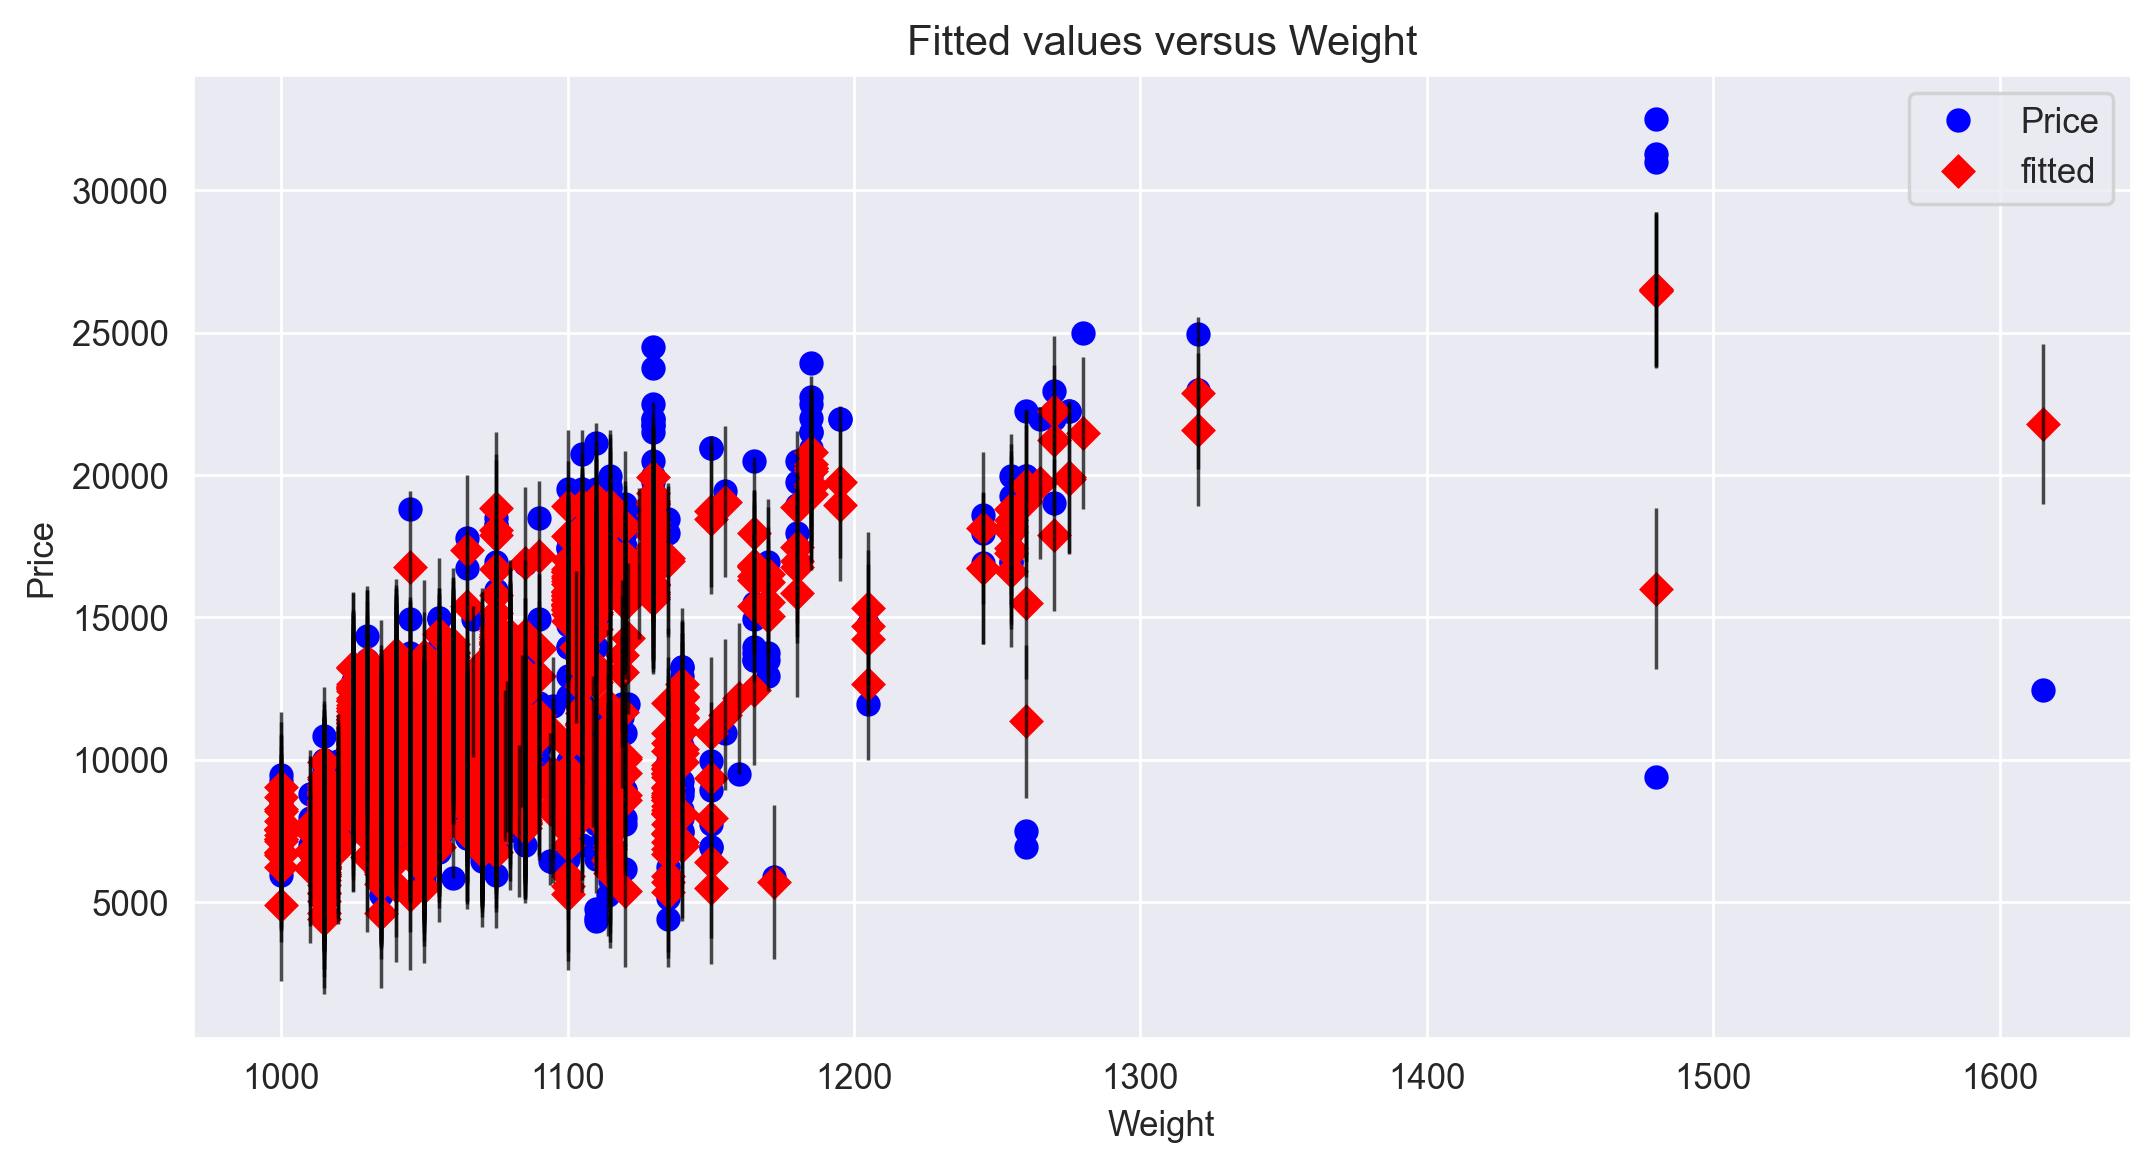

In [89]:
sm.graphics.plot_fit(model, 'Weight');

In [90]:
# Here also the difference is very low.

In [91]:
# By plotting all the residuals v/s regressors plot we can say that the model's performace is not up to the mark
# Q-Q plot also told the same
# Constant Variance has also told the same story.

In [92]:
# Model Deletion Techniques.
# cook's distance

In [93]:
inf = model.get_influence()
c,p = inf.cooks_distance
c

array([8.19507952e-03, 4.51554723e-03, 6.19579126e-03, ...,
       1.47953713e-06, 7.66982434e-04, 1.19475212e-02])

In [94]:
# Plotting cooks distance

Text(0, 0.5, 'Cooks Distance')

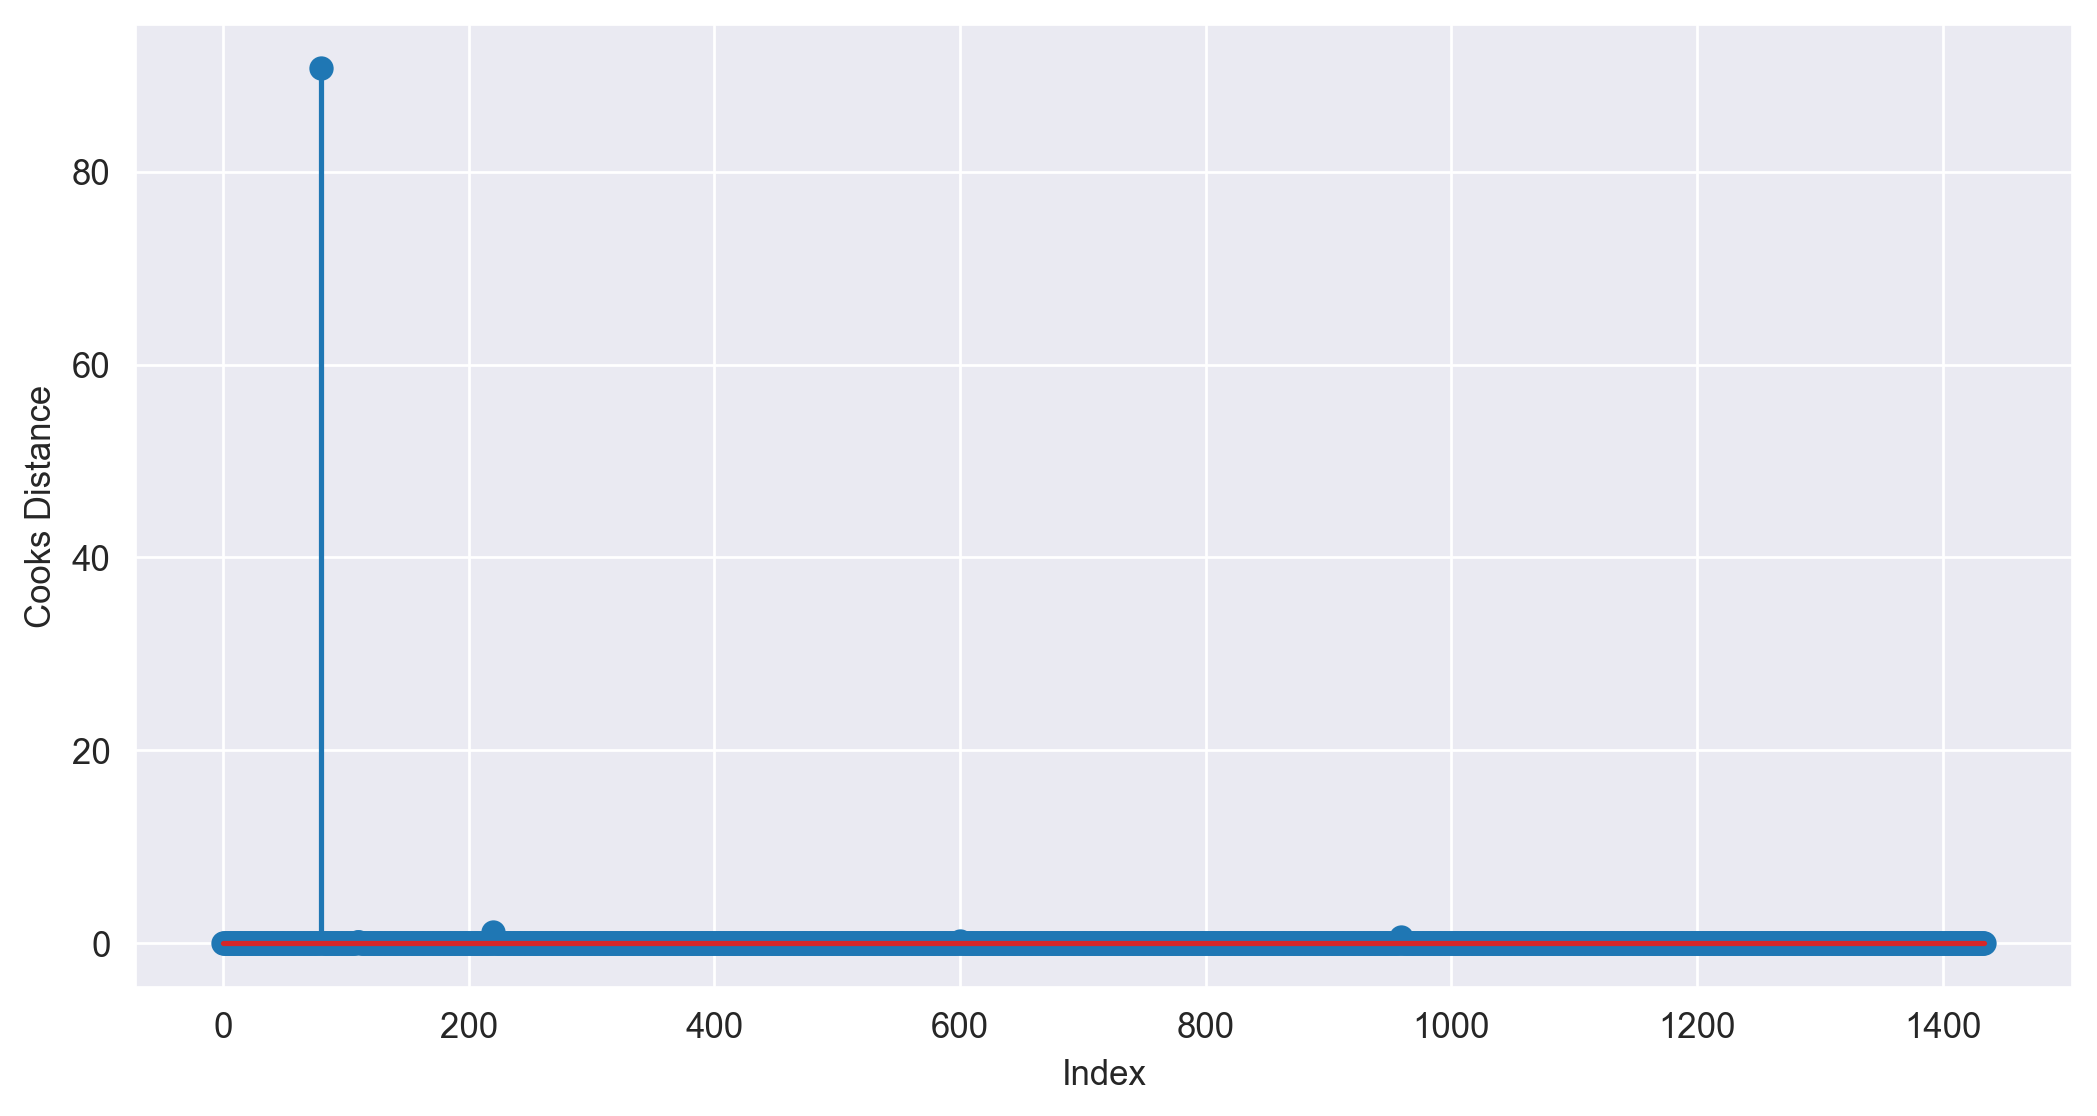

In [95]:
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')

In [96]:
# Checking index no. of maximum cooks distance

In [97]:
np.argmax(c), np.max(c)

(80, 90.74324839903167)

In [98]:
df.iloc[[80]]

Price  Age_08_04     KM   HP     cc  Doors  Gears  Quarterly_Tax  Weight
80  18950         25  20019  110  16000      5      5            100    1180

In [99]:
# Calculating the cut off of cooks distance

In [100]:
k = len(df.columns)
n = len(df)
lv = 3*(k+1)/n
lv

0.020905923344947737

In [101]:
# it means datapoints after the 0.020 leverage is influencial datapoint 
# We need to remove that influence 

In [102]:
df.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [103]:
# Plotting influence plot

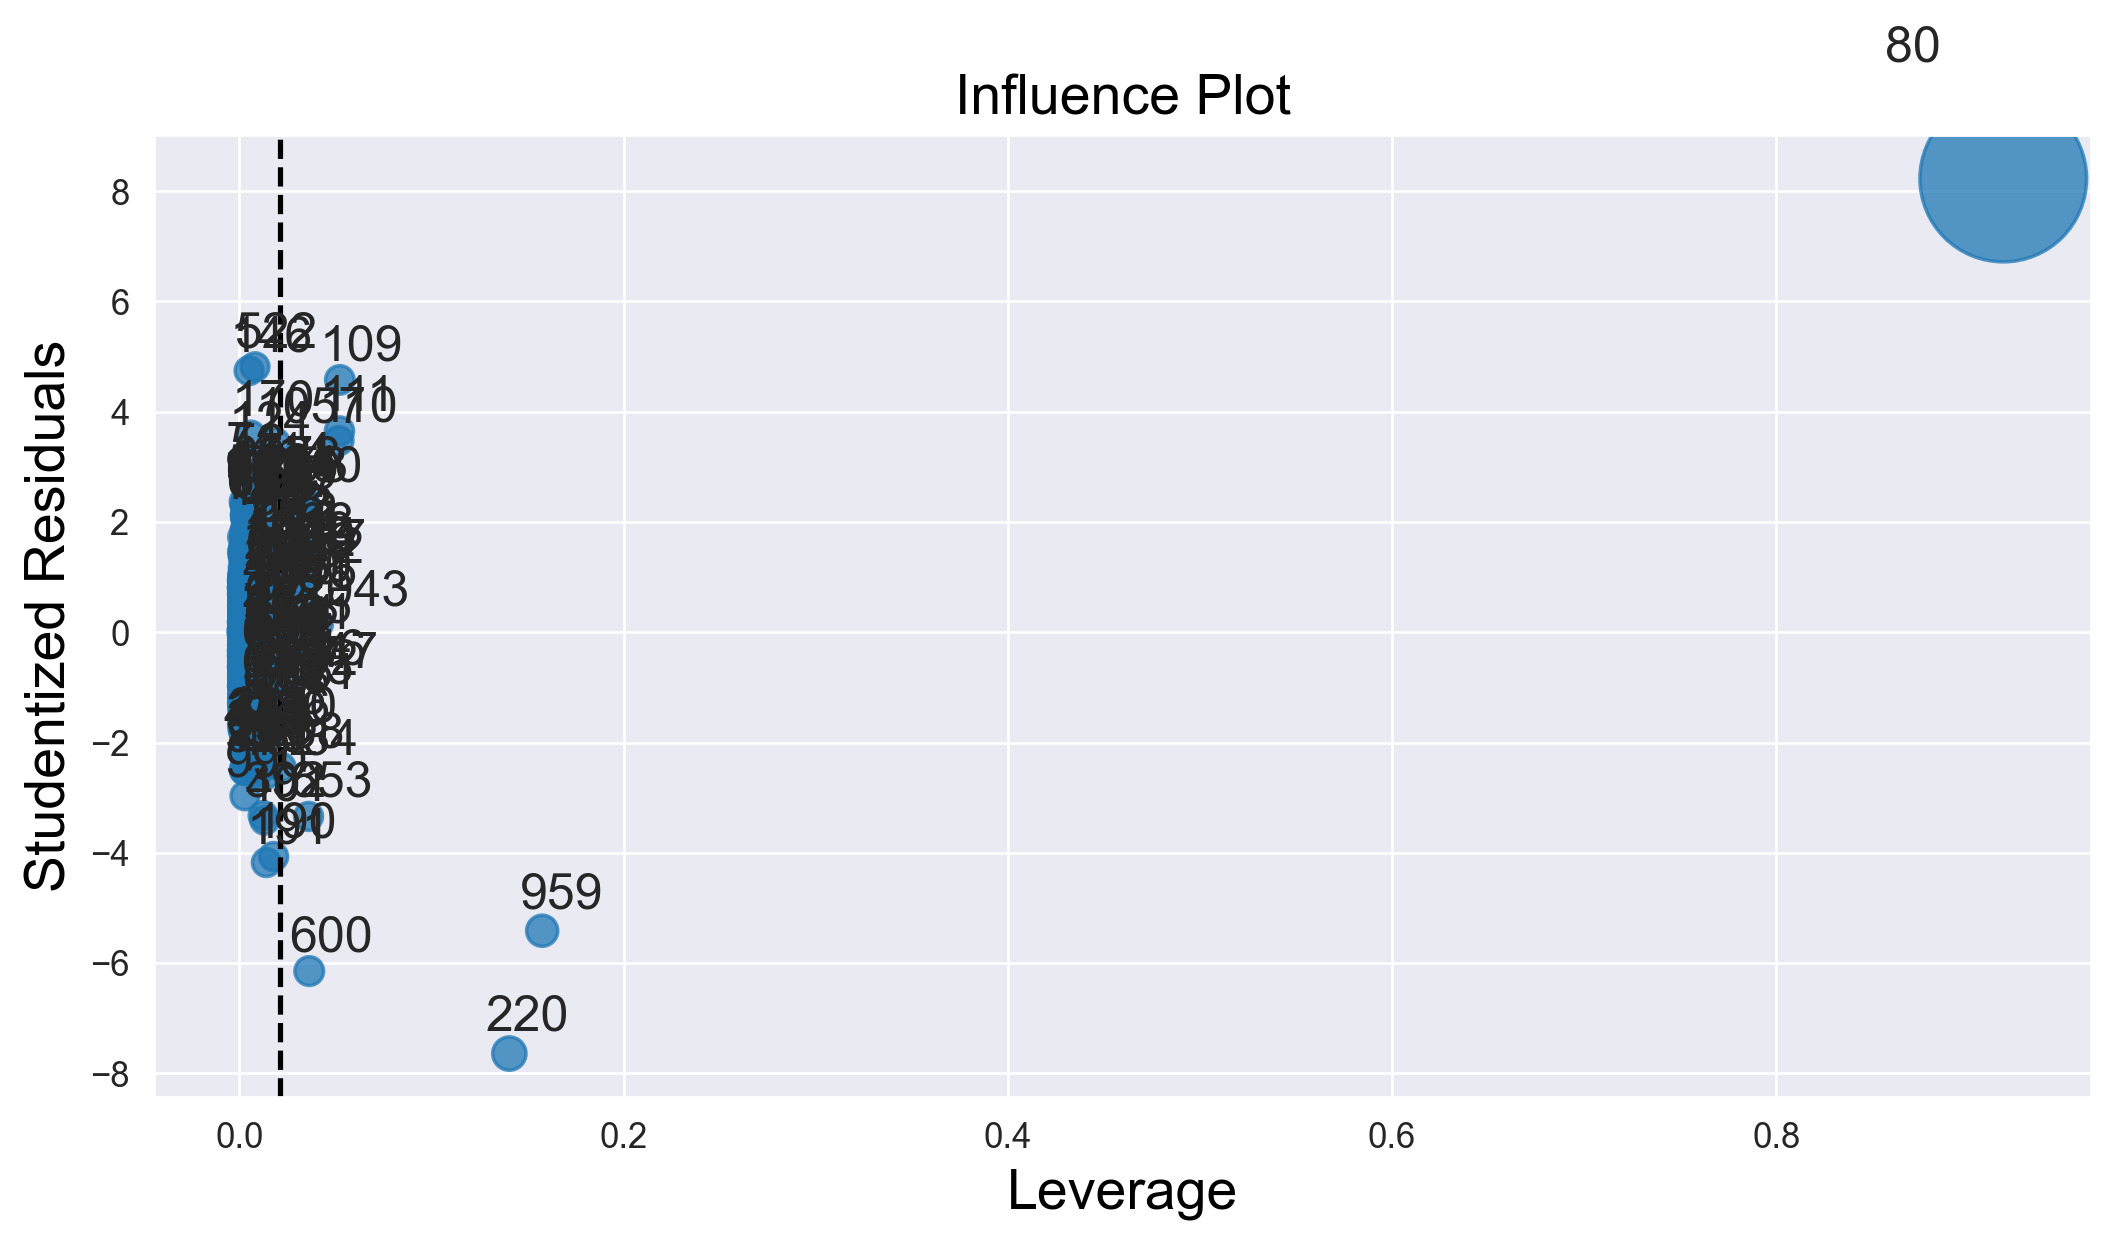

In [104]:
influence_plot(model)
plt.axvline(lv, linestyle = '--', color = 'black')

In [105]:
# Extracting influencial data points

In [106]:
influential_records = df.index[c > lv]
influential_records

Int64Index([14, 16, 49, 80, 109, 110, 111, 140, 190, 191, 220, 522, 600, 653,
            959, 1057],
           dtype='int64')

In [107]:
# Droping the influential datapoints to improve model performance

In [108]:
df.drop(influential_records, inplace = True)
df

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1430   7500         69  20544   86  1300      3      5             69    1025
1431  10845         72  19000   86  1300      3      5             69    1015
1432   8500         71  17016   86  1300      3      5             69    1015
1433   7250         70  16916   86  1300      3      5             69    1015
1434   6950         76      1  110  1600      5      5             19    1114

[1419 rows x 9 columns]

In [109]:
# Reseting the index numbers

In [110]:
# Final model

In [111]:
final_model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight', data=df).fit()
final_model

In [112]:
final_model.rsquared

0.8849586217704501

In [113]:
model.rsquared

0.861632231877993

In [114]:
final_model.pvalues

Intercept         1.543778e-22
Age_08_04        8.008856e-286
KM                1.068902e-47
HP                2.724042e-27
cc                1.073648e-27
Doors             7.956417e-05
Quarterly_Tax     9.129719e-02
Weight            3.250036e-93
dtype: float64

In [115]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1551.
Date:                Fri, 16 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:34:47   Log-Likelihood:                -12023.
No. Observations:                1419   AIC:                         2.406e+04
Df Residuals:                    1411   BIC:                         2.410e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.263e+04   1271.386     -9.937      0.000   -1.51e+04   -1.01e+04
Age_08_04      -111.8131      2.412    -46.354      0.000    -116.545    -107.081
KM               -0.0172      0.001    -15.070      0.000      -0.019      -0.015
HP               30.0014      2.715     11.052      0.000      24.676      35.326
cc               -3.3518      0.301    -11.142      0.000      -3.942      -2.762
Doors          -140.8233     35.586     -3.957      0.000    -210.629     -71.017
Quarterly_Tax     2.3065      1.365      1.690      0.091      -0.371       4.984
Weight           31.1369      1.409     22.105      0.000      28.374      33.900
==============================================================================
Omnibus:                       47.101   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.705
Skew:                           0.177   Prob(JB):                     8.22e-23
Kurtosis:                       4.263   Cond. No.                     3.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
# We can see that after removing the Influential records from data our model's accuracy is increased.
# Even if the size of data is reduced but the data which is now availabe is good and relevent to predct the price.

In [117]:
# Plotting the Q-Q plot for final_model v/s model

Text(0.5, 1.0, 'Q-Q Plot of final_model')

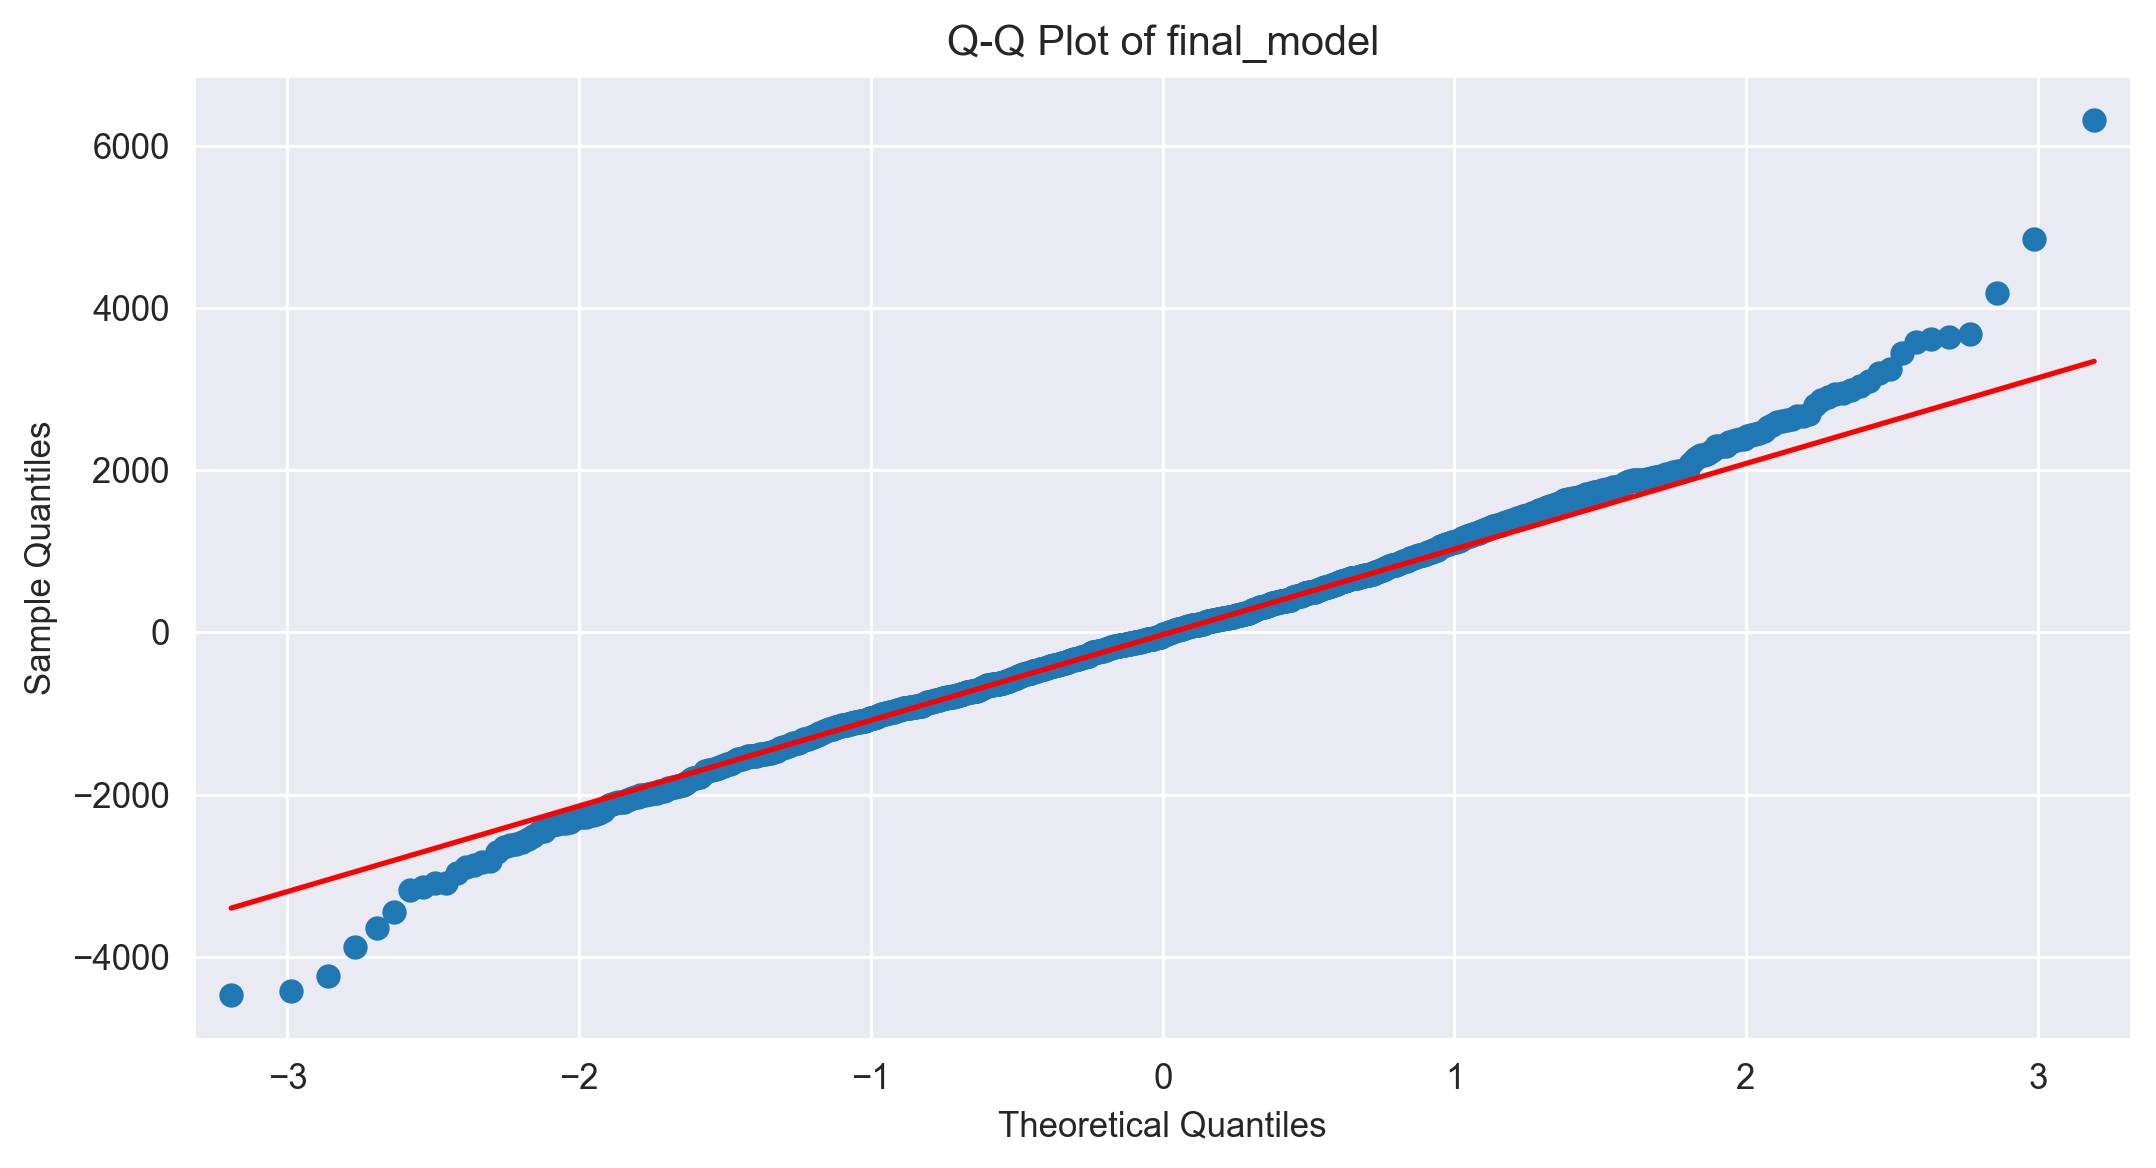

In [118]:
sm.qqplot(final_model.resid, line='q');
plt.title('Q-Q Plot of final_model')


Text(0.5, 1.0, 'Q-Q Plot of model')

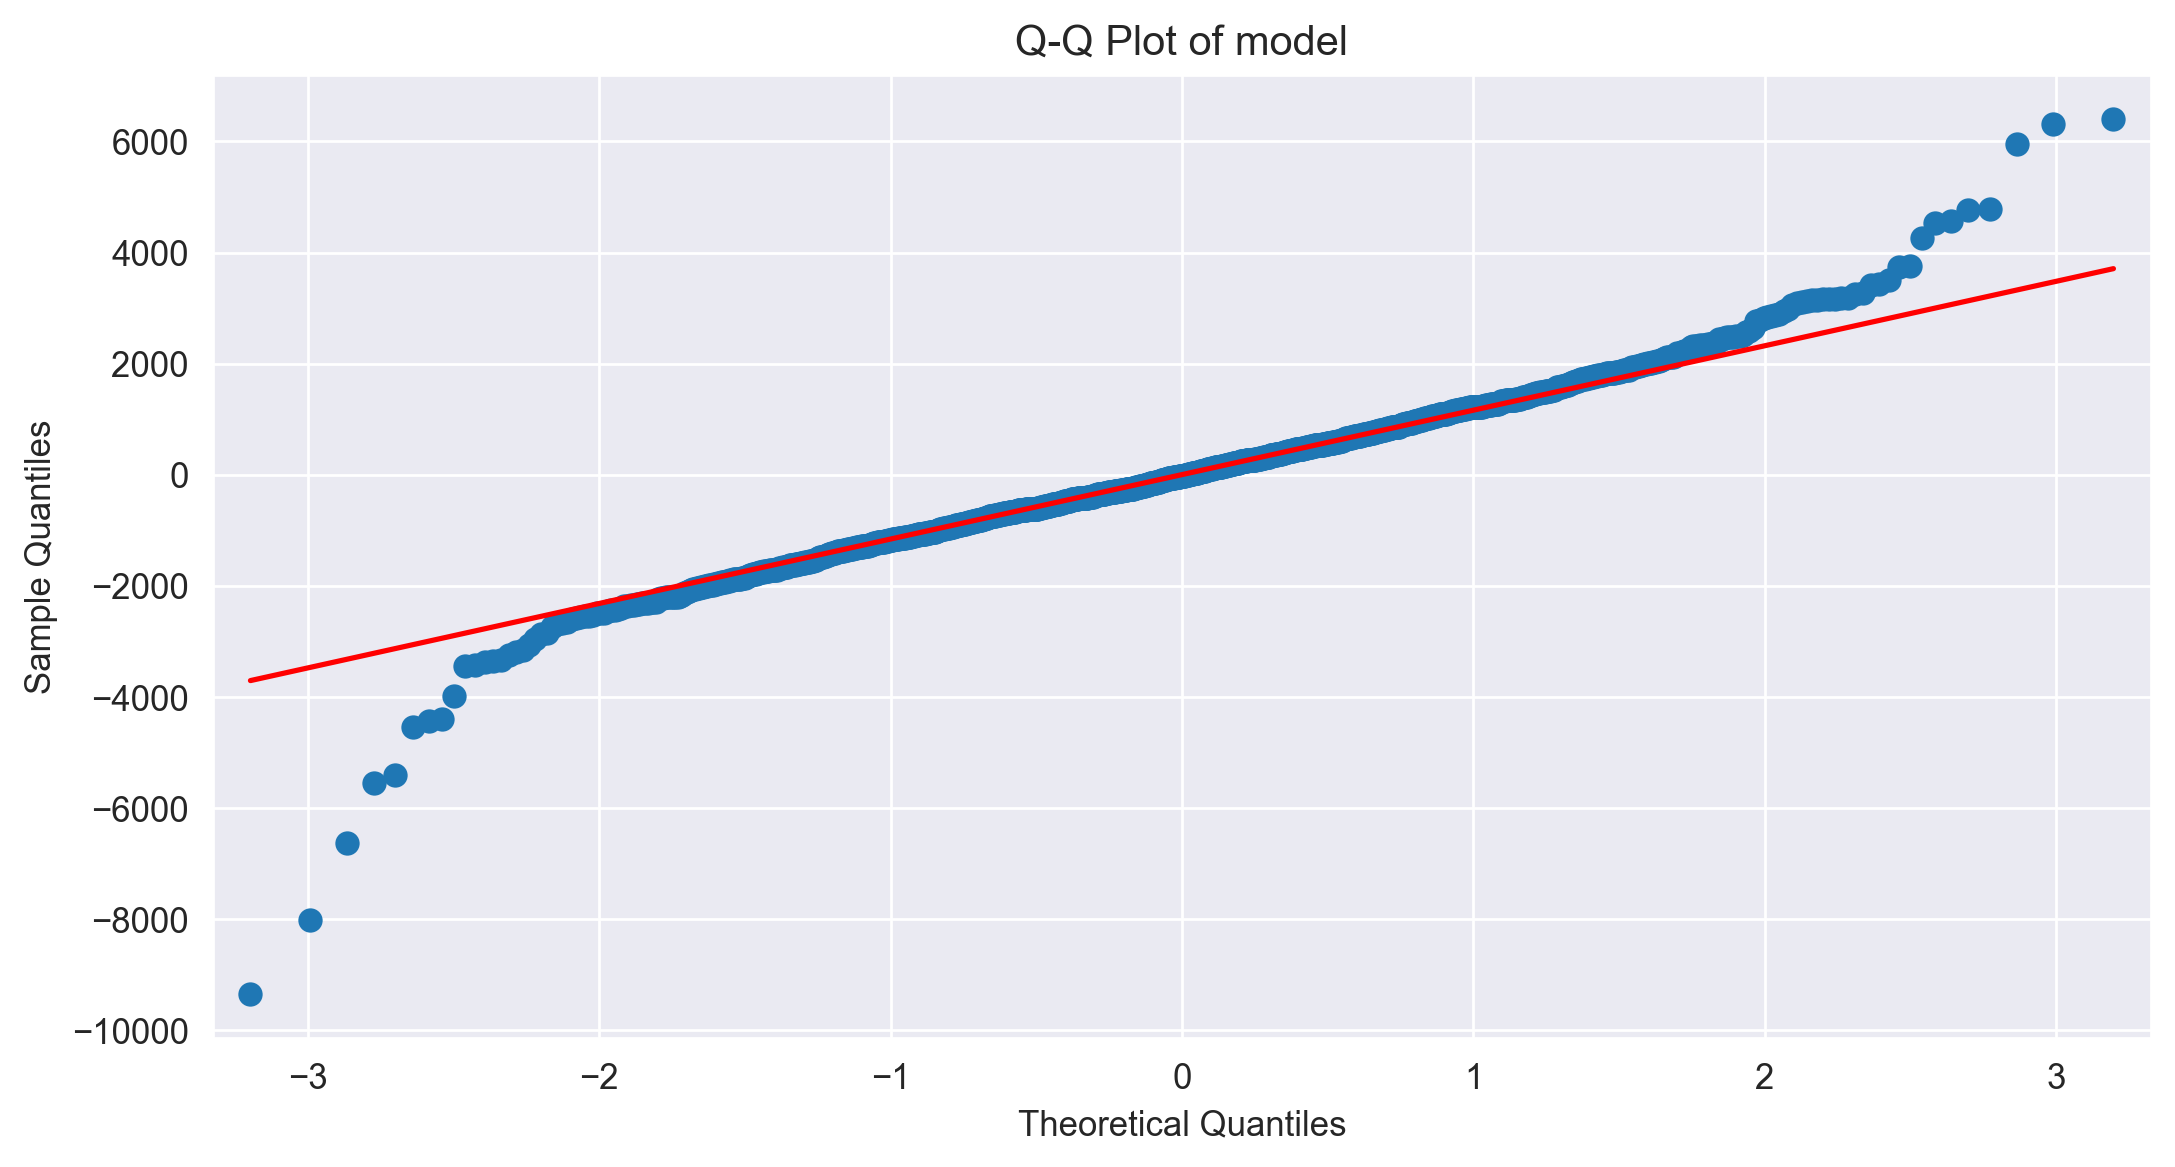

In [119]:
sm.qqplot(model.resid, line='q');
plt.title('Q-Q Plot of model')

In [120]:
# Checking cooks distance of final_model

In [121]:
abc = final_model.get_influence()
d,p = inf.cooks_distance
d

array([8.19507952e-03, 4.51554723e-03, 6.19579126e-03, ...,
       1.47953713e-06, 7.66982434e-04, 1.19475212e-02])

In [122]:
# We can clearly see the difference between both plots
# the datapoints are not far away from other datapoints and skewness is reduced from very high to moderate

In [123]:
# Predicting the new records

In [124]:
df.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [125]:
test = pd.DataFrame({
    'Age_08_04' : [20,21,23,25,27,26,30,22],
    'KM' : [35000,36475,41975,44410,56794,6500,78144,69999],
    'HP' : [70,75,80,85,90,95,100,110],
    'cc' : [1600,1800,2000,1900,2200,2100,1700,1950],
    'Doors' : [3,3,3,4,4,5,3,4],
    'Quarterly_Tax' : [200,210,205,220,222,230,228,229],
    'Weight' : [1100,1200,1150,1030,1340,1279,1165,1301]
})
test

Age_08_04     KM   HP    cc  Doors  Quarterly_Tax  Weight
0         20  35000   70  1600      3            200    1100
1         21  36475   75  1800      3            210    1200
2         23  41975   80  2000      3            205    1150
3         25  44410   85  1900      4            220    1030
4         27  56794   90  2200      4            222    1340
5         26   6500   95  2100      5            230    1279
6         30  78144  100  1700      3            228    1165
7         22  69999  110  1950      4            229    1301

In [126]:
final_model.predict(test)

0    15553.645280
1    18032.849867
2    15625.806613
3    12002.781883
4    20367.478163
5    19808.669967
6    16346.044606
7    20938.963757
dtype: float64

In [127]:
# These are the predicted price of car with given parameters.